# **INTRODUCTION**

---



We import the necessary libraries for this project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import textwrap
import calendar

The datasets that we are going to use were downloaded from the Toronto government's open data portal at https://open.toronto.ca/dataset/ttc-subway-delay-data/

At the time of this project, the portal was last updated on October 18, 2024.

The files were imported into python as excel files. The excel files containing data for periods June 2017 to 2021 have individual sheets containing the monthly data. We'll concatenate these into one annual data frame.

In [ ]:
df_2024 = pd.read_excel('/content/ttc-subway-delay-data-2024.xlsx', sheet_name = None)
df_2023 = pd.read_excel('/content/ttc-subway-delay-data-2023.xlsx', sheet_name = None)
df_2022 = pd.read_excel('/content/ttc-subway-delay-data-2022.xlsx', sheet_name = None)
df_2021 = pd.read_excel('/content/ttc-subway-delay-data-2021.xlsx', sheet_name = None)
df_2020 = pd.read_excel('/content/ttc-subway-delay-data-2020.xlsx', sheet_name = None)
df_2019 = pd.read_excel('/content/ttc-subway-delay-data-2019.xlsx', sheet_name = None)
df_2018 = pd.read_excel('/content/ttc-subway-delay-data-2018.xlsx', sheet_name = None)
df_jan2014apr2017 = pd.read_excel('/content/ttc-subway-delay-jan-2014-april-2017.xlsx', sheet_name = None)
df_may2017dec2017 = pd.read_excel('/content/ttc-subway-delay-may-december-2017.xlsx', sheet_name = None)

df_2024 = pd.concat(df_2024.values(), ignore_index = True)
df_2023 = pd.concat(df_2023.values(), ignore_index = True)
df_2022 = pd.concat(df_2022.values(), ignore_index = True)
df_2021 = pd.concat(df_2021.values(), ignore_index = True)
df_2020 = pd.concat(df_2020.values(), ignore_index = True)
df_2019 = pd.concat(df_2019.values(), ignore_index = True)
df_2018 = pd.concat(df_2018.values(), ignore_index = True)
df_jan2014apr2017 = pd.concat(df_jan2014apr2017.values(), ignore_index = True)
df_may2017dec2017 = pd.concat(df_may2017dec2017.values(), ignore_index = True)
df_codes = pd.read_excel('/content/ttc-subway-delay-codes.xlsx')
df_readme = pd.read_excel('/content/ttc-subway-delay-data-readme.xlsx')

We combine the annual datasets into one dataframe, in preparation for data cleaning. For now, we're not including the data frame on the delay codes.

In [ ]:
df_master = pd.concat([df_2024, df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_may2017dec2017, df_jan2014apr2017], ignore_index = True)

Let's look into the consolidated data set by describing it to see just what we're working with.

In [ ]:
df_master.describe(include = 'all')

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
count,215602,215602,215602,215602,215601,215602.000000,215602.000000,160014,214919,215602.000000
unique,NaN,1440,7,1281,222,NaN,NaN,9,91,NaN
top,NaN,22:00,Thursday,KENNEDY BD STATION,MUSC,NaN,NaN,S,YU,NaN
freq,NaN,4453,33601,8576,21347,NaN,NaN,45574,104449,NaN
mean,2019-06-07 10:40:29.209376512,NaN,NaN,NaN,NaN,2.517551,3.724024,NaN,NaN,3729.459532
min,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000
25%,2016-08-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000
50%,2019-04-03 00:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,5191.000000
75%,2022-06-05 00:00:00,NaN,NaN,NaN,NaN,3.000000,7.000000,NaN,NaN,5606.000000
max,2024-09-30 00:00:00,NaN,NaN,NaN,NaN,999.000000,999.000000,NaN,NaN,72537.000000


We'll be working with 215,602 rows of data recorded from January 2014 to September 30, 2024. We have ten (10) attributes:

1) Date - in YYYY/MM/DD;

2) Time - in 24H clock;

3) Day - name of the day of the week;

4) Station - TTC subway station name;

5) Code - TTC delay code;

6) Min Delay - delay (in minutes) to subway service;

7) Min Gap - time length (in minutes) between trains;

8) Bound - direction of the train dependend on the line;

9) Line - TTC subway line, i.e. YU, BD, SHP, and SRT; and

10) Vehicle - TTC train number.

# **DATA CLEANING**

---



## Leading and Trailing Spaces

Let's drop leading and trailing spaces in our data.

In [ ]:
for col in df_master.select_dtypes(include = ['object']):
  df_master[col] = df_master[col].str.strip()

## Null Values

Let's check for any null values.

In [ ]:
df_master.isnull().sum()

,0
Date,0
Time,0
Day,0
Station,0
Code,1
Min Delay,0
Min Gap,0
Bound,55588
Line,683
Vehicle,0


The 'Bound' and 'Line' columns have 55,588 and 683 null entries, respectively. The 'Code' column has one (1).

### 'Code' Column

In [ ]:
print(df_master[df_master['Code'].isnull()])

             Date   Time     Day          Station Code  Min Delay  Min Gap  \
137145 2017-07-07  06:09  Friday  COXWELL STATION  NaN          0        0   

       Bound Line  Vehicle  
137145     E   BD     5124  


It's a delay occurrence in Coxwell Station that lasted less than a minute. To remedy this, we drop the row with the null value.

In [ ]:
df_master = df_master.dropna(subset=['Code'])

### 'Bound' Column

The 'Bound' column records the direction the train was heading to when the delay occurred. Looking into a snapshot of the dataframe with the null entries in the 'Bound' column, we can see that we still have the other data in the other columns such as Date, Time, Station, and Min Gap. These are more important compared to the data on the direction of the train, at least relative to the purpose of this project.

As such, we will not be removing the rows with null entries in the 'Bound' column.

### 'Line' and 'Station' Columns

In [ ]:
print(df_master[df_master['Line'].isnull()])

             Date   Time        Day                Station   Code  Min Delay  \
2257   2024-01-31  01:41  Wednesday        SPADINA STATION   MUIS          0   
2498   2024-02-04  00:08     Sunday    SPADINA YUS STATION   MUIS          0   
3413   2024-02-16  22:01     Friday          GUNN BUILDING   PUMO          0   
3687   2024-02-20  22:13    Tuesday          QUEEN STATION    SUO          0   
7095   2024-04-07  01:11     Sunday       UNKNOWN LOCATION    MUO          0   
...           ...    ...        ...                    ...    ...        ...   
213229 2017-03-14  14:14    Tuesday          GUNN BUILDING   MUIE          0   
213456 2017-03-18  15:58   Saturday     KENNEDY BD STATION  MUIRS          0   
213511 2017-03-20  00:21     Monday           JANE STATION  PUMEL          0   
214820 2017-04-15  05:35   Saturday          QUEEN STATION  MUNCA          0   
214894 2017-04-16  16:01     Sunday  ST GEORGE YUS STATION   MUIS          0   

        Min Gap Bound Line  Vehicle  
2

The 'Line' column contains data on which TTC line the delay occurred. As of writing, there are/were officially four (4) TTC subway lines: Line 1 Yonge-University, Line 2 Bloor-Danforth, Line 3 Scarborough, and Line 4 Sheppard. Line 3 Scarborough was closed in July 2023.

Upon checking the rows with null entries in the 'Line' column, we can see that we can interpolate from the 'Station' column the TTC line in which the delay occurred.

Our data cleaning won't be as straightforward as it seems...

Let's look at the 'Station' column more closely.

**'Station' Column**

In [ ]:
print(len(df_master['Station'].unique()))

1279


There are 1,279 unique data entries under the 'Station' column. This poses a huge challenge in our data cleaning efforts. Certain stations appear in different forms, for instance: 'Vaughan MC to Finch St', 'Vaughan MC Station', Vaughan MC Station to', etc.

Here we run in a notable issue within the TTC Delay Dataset: it's not very precise.
For instance, 'Vaughan MC to Finch St' may mean the delay occurred somewhere between Vaughan Metropolitan Centre Station to Finch Station. If we check the TTC subway map, however, we can see that there are 32 stations between the former and the latter. So how do we know for certain in which station this delay occurred?

To simplify things, we'll assume that the first station name that appeared in the 'Station' column is the station in which the delay occurred, regardless whether the actual delay happened in between stations, i.e. while the train is running between stations.

We'll create a dictionary of all the stations and their related key words. We need to refine the key words to make sure that we're capturing all the unique names, even the ones with typographical errors. At the same time, we should ensure that we're not assigning a station to the wrong one. For instance, in the above example, 'Vaughan MC to Finch St' should be tagged to Vaughan Metropolitan Center Station and not to Finch Station.

In [ ]:
line_1 = {
    'Vaughan Metropolitan Centre' : ['vau', 'vmc', '3150 Hwy 7'],
    'Highway' : ['highway', 'high way', '7332 Jane St'],
    'Pioneer Village' : ['pio', 'pioneer_village', '185 Northwest Gt'],
    'York University' : ['york uni', 'york_university', '120 Ian Macdonald Blvd'],
    'Finch West' : ['finch west', 'finch_west', '3950 Keele St'],
    'Downsview Park' : ['downsview', 'down', 'downsview_park', '25 Vitti St'],
    'Sheppard West' : ['sheppard west', 'sheppard_west', '1035 Sheppard Ave W'],
    'Wilson' : ['wils', 'wisl', '570 Wilson Ave'],
    'Yorkdale' : ['yorkdale', '50 Yorkdale Rd'],
    'Lawrence West' : ['lawrence west', 'lawrence_west', '665 Lawrence Ave W'],
    'Glencairn' : ['glen', '785 Glencairn Ave'],
    'Eglinton West' : ['eglinton west', 'eglinton_west', '1300 Eglinton Ave W'],
    'St. Clair West' : ['st clair west', 'st. clair west', 'st_clair_west', '370 St Clair Ave W'],
    'Dupont' : ['dupont', '263 Dupont St'],
    'Museum' : ['museum', '75 Queen\'s Park'],
    'Queens Park' : ['queens park', 'queens_park', '671 University Ave'],
    'St. Patrick' : ['st patr', 'st. patr', 'stpatr', 'st_patrick', '449 University Ave'],
    'Osgoode' : ['osgoode', '181 Queen St W'],
    'St. Andrew' : ['st and', 'st. and', 'standr', 'st_andrew', '173 King St W'],
    'Union' : ['union', '55 Front St W'],
    'King' : ['king', '3 King St E'],
    'Queen' : ['queen', '3 Queen St E'],
    'Dundas' : ['dund', '3 Dundas St E'],
    'College' : ['college', '3 Carlton St'],
    'Wellesley' : ['welles', 'welle', 'wells', '16 Wellesley St E'],
    'Rosedale' : ['rosedale', '7 Crescent Rd'],
    'Summerhill' : ['summe', '16 Shaftesbury Ave'],
    'St. Clair' : ['st clair', 'st. cla', 'stcla', 'st.cla', 'st cal', 'st_clair', '15 St Clair Ave E'],
    'Davisville' : ['davis', '1900 Yonge St'],
    'Eglinton' : ['eglinton', 'egi', '2190 Yonge St'],
    'Lawrence' : ['lawr', 'lawer', '3101 Yonge St'],
    'York Mills' : ['york mills', 'york_mills', '4025 Yonge St'],
    'North York Centre' : ['north york', 'north_york_centre', '5152 Yonge St'],
    'Finch' : ['finch', 'ficn', '5714 Yonge St']}

line_2 = {
    'Kipling' : ['kipl', 'kilp', '950 Kipling Ave'],
    'Islington' : ['isli', '1240 Islington Ave'],
    'Royal York' : ['royal york', 'royal_york', '955 Royal York Rd'],
    'Old Mill' : ['old mill', 'old_mill', '2672 Bloor St W'],
    'Jane' : ['jane', '15 Jane St'],
    'Runnymede' : ['runnymede', '265 Runnymede Rd'],
    'High Park' : ['high park', 'high_park', '35 Quebec Ave'],
    'Keele' : ['keele', '21 Keele St'],
    'Dundas West' : ['dundas west', 'dunda we', 'dundas_west', '2365 Dundas St W'],
    'Lansdowne' : ['lansdowne', '691 Lansdowne Ave'],
    'Dufferin' : ['dufferin', '1006 Dufferin St'],
    'Ossington' : ['ossing', 'ossig', '746 Ossington Ave'],
    'Christie' : ['christie', '5 Christie St'],
    'Bathurst' : ['bathu', '819 Bathurst St'],
    'Bay' : ['bay', '1234 Bay St'],
    'Sherbourne' : ['sherbourne', '633 Sherbourne St'],
    'Castle Frank' : ['castle frank', 'castle_frank', '600 Bloor St E'],
    'Broadview' : ['broadview', 'braod', 'broad', 'brod', '769 Broadview Ave'],
    'Chester' : ['chester', '22 Chester Ave'],
    'Pape' : ['pape', '743 Pape Ave'],
    'Donlands' : ['donlands', '30 Donlands Ave'],
    'Greenwood' : ['greenwood', '10 Linnsmore Cres'],
    'Coxwell' : ['coxwell', 'cox', '355 Strathmore Blvd'],
    'Woodbine' : ['woodbine', '991 Woodbine Ave'],
    'Main Street' : ['main street', 'main_street', '315 Main St'],
    'Victoria Park' : ['victoria park', 'victoria_park', '777 Victoria Park Ave'],
    'Warden' : ['warden', '701 Warden Ave'],
    'Kennedy' : ['kenn', '2455 Eglinton Ave E']}

line_3 = {
    'Lawrence East:' : ['lawrence east', 'lawrence_east', '2444 Lawrence Ave E'],
    'Ellesmere' : ['ellesmere', '1025 Ellesmere Rd'],
    'Midland' : ['midland', '2085 Midland Ave'],
    'Scarborough_centre' : ['scarb', 'scarborough_centre', '290 Borough Dr'],
    'Mccowan' : ['mcco', 'mc co', '1275 McCowan Rd']}

line_4 = {
    'Bayview' : ['bayview', '550 Sheppard Ave E'],
    'Bessarion' : ['bess', '731 Sheppard Ave E'],
    'Leslie' : ['leslie', '1209 Sheppard Ave E'],
    'Don Mills' : ['don m', 'donmi', 'don_mills', '1700 Sheppard Ave E']}

line_1_4 = {
    'Sheppard-Yonge' : ['sheppard', 'sheppard yonge', 'yonge shep', 'sehp', 'yonge shp', 'sheppard-yonge', '20 Sheppard Ave W']}

line_1_2 = {
    'Spadina' : ['spadina', '6 Spadina Rd'],
    'St. George' : ['st geo', 'stgeo', 'st. geo', 'st.geo', 'st_george', '139 St George St'],
    'Bloor-Yonge' : ['bloor', 'bloor-yonge', 'yonge', 'young', 'yu', 'danf', '35 Bloor St E',
                     'yonge bd', 'yonge-uni', 'yonge - uni', 'yonge / uni',
                     'yonge- uni', 'yonge uni', 'yonge/uni', 'yonge/u', 'yonge station',
                     'line 1 - yonge', 'line 1: yonge', 'subway line 1', 'yonge u']}

We'll need to run all the unique names in the 'station' column through our dictionary above. If any of the keywords match with the station name, the function below will return the "cleaned" station name in a newly created 'station_clean' column within the df_master dataframe.

In [ ]:
def clean_station_column(station_name):
    all_lines = {**line_1, **line_2, **line_3, **line_4, **line_1_2, **line_1_4}
    for category, keywords in all_lines.items():
      if any(keyword in station_name.lower() for keyword in keywords):
        return category
    return "Other"

df_master['station_clean'] = df_master['Station'].apply(clean_station_column)

Below is a code to view all the unique entries left in the 'Station' column tagged as 'Other' in the 'station_clean' column. We'll run this multiple times as we keep on updating and refining our dictionary above. Once we're done, what should be left in the output of the code below should be the unidentifiable stations.

In [ ]:
print(df_master[df_master['station_clean'] == 'Other']['Station'].unique())
print(len(df_master[df_master['station_clean'] == 'Other']['Station'].unique()))

['SUBWAY CLOSURE: WEEKEN' 'TORONTO TRANSIT COMMIS' 'UNKNOWN LOCATION'
 'LINE 1 SUBWAY CLOSURE' 'MILL STREET EMERGENCY' 'GUNN BUILDING'
 'LEONA EE' 'CHANGE OVERS LINE TWO' 'S/O TEDDINGTON TO S/O'
 'MARKDALE EMERGENCY EXI' 'WILFRED EMERGENCY EXIT' 'HILLCREST COMPLEX'
 'EARLY SUBWAY CLOSURE:' 'LINE 1' 'WEEKEND CLOSURE - WOOD' 'WILFRED EE'
 'MULTIPLE STATIONS' 'VARIOUS LOCATIONS' 'RUSSEL HILL EE - INTRU'
 'BUCHAN ESB' 'MARKDALE EEB' 'HILLCREST GATE' 'VARIOUS LOCATION'
 'SUBWAY OPS BUILDING' 'WEEKEND CLOSURE SHEPPA' 'TORONTO TRANSIT CONTRO'
 'SYSTEM WIDE' 'MCDONALD CARTIER EMERG' 'TRACK LEVEL ACTIVITY'
 'SYSTEMWIDE' 'ASQUITH SUBSTATION' 'LOST ARTICLES OFFICE -'
 'SUBWAY CLOSURE: WOODBI' 'SRT LINE' 'NORTH HOSTLER (LEAVING' 'LINE 4'
 'MCBRIEN BUILDING' 'LINE 2 BD' 'LINE 3' 'ALLEN ROAD AND EGLINTO'
 '1 TIPPETT ROAD' 'MC BRIEN' 'SAFE APP' 'DUNCAN BUILDING' 'LYTTON EE'
 'TRANSIT CONTROL' 'HILLCREST - SUBWAY OPE' 'SRT YARD' 'SRT LINE 3'
 'LINE 2' 'BIRCHMOUNT EE' 'GUNN BUILDING - 2ND FL' 'CNE EAST

Once that's done, we see that there are still 134 unique entries that are tagged as 'Other' despite our best cleaning efforts. That's not too bad considering we started with 1,279!

Let's check if our function correctly assigned data with two (2) stations in their entry such as cited previously "Vaughan MC to Finch We".

In [ ]:
df_master[df_master['Station'] == 'VAUGHAN MC TO FINCH WE']

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,station_clean
26702,2023-04-20,23:00,Thursday,VAUGHAN MC TO FINCH WE,MUO,0,0,NaN,YU,0,Vaughan Metropolitan Centre


Looks like our function did it correctly!

In [ ]:
print(len(df_master[df_master['station_clean'] == 'Other']))

980


We have 978 rows of data whose station we cannot identify and has been tagged 'Other'. Upon closer look, the entries under 'Station' are not station names at all, but are specific places such as address, buildings, portals, and substations.

Let's decide to drop these rows from our dataset.

In [ ]:
df_master = df_master[df_master['station_clean'] != 'Other']

**'Line' Column**

Now we'll go back to our 'Line' column and work on populating the null values given the data we have in the 'station_clean' column.

In [ ]:
df_master[df_master['Line'].isnull()]

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,station_clean
2257,2024-01-31,01:41,Wednesday,SPADINA STATION,MUIS,0,0,NaN,NaN,3755,Spadina
2498,2024-02-04,00:08,Sunday,SPADINA YUS STATION,MUIS,0,0,NaN,NaN,0,Spadina
3687,2024-02-20,22:13,Tuesday,QUEEN STATION,SUO,0,0,N,NaN,0,Queen
7253,2024-04-09,22:01,Tuesday,LESLIE STATION,MUO,0,0,NaN,NaN,0,Leslie
7438,2024-04-11,01:06,Thursday,SPADINA YUS STATION,MUIRS,0,0,NaN,NaN,0,Spadina
...,...,...,...,...,...,...,...,...,...,...,...
213034,2017-03-10,16:02,Friday,WILSON CARHOUSE,EUO,0,0,NaN,NaN,0,Wilson
213456,2017-03-18,15:58,Saturday,KENNEDY BD STATION,MUIRS,0,0,NaN,NaN,0,Kennedy
213511,2017-03-20,00:21,Monday,JANE STATION,PUMEL,0,0,NaN,NaN,1014,Jane
214820,2017-04-15,05:35,Saturday,QUEEN STATION,MUNCA,0,0,NaN,NaN,0,Queen


For rows with null entries in 'Line', we'll check their corresponding values in 'station_clean' and run that through the dictionary we created above. Notice how we assigned each station to its line in the dictionary? That will serve its purpose here in assigning the correct TTC line for each station.

Lines 1 and 2 has a peculiar challenge in that they share two (2) common stations, in other words, there are three (3) stations where commuters can transfer from Line 1 to Line 2. These are Spadina Station, St. George Station, and Bloor-Yonge Station.

Lines 1 and 4 also has one (1) in common : Sheppard-Yonge Station.

We will not assign these common stations into each of the lines and instead categorized them into different groups, 'Line 1 and 2 Shared' and 'Line 1 and 4 Shared'.

For entries tagged as 'Other' in 'station_clean', we'll likewise tag their 'line_clean' as 'Other'.

In [ ]:
def categorize_line(row):
    station_clean = row['station_clean']
    if station_clean in line_1:
        return 'Line 1 Yonge-University'
    elif station_clean in line_2:
        return 'Line 2 Bloor-Danforth'
    elif station_clean in line_3:
        return 'Line 3 Scarborough'
    elif station_clean in line_4:
        return 'Line 4 Sheppard'
    elif station_clean in line_1_2:
        return 'Lines 1 and 2 Shared'
    elif station_clean in line_1_4:
        return 'Lines 1 and 4 Shared'
    else:
        return 'Other'

df_master['line_clean'] = df_master.apply(categorize_line, axis=1)
df_master['Line'] = df_master['Line'].fillna(df_master['line_clean'])

Finally, let's verify if we were able to populate the null values under the 'Line' column.

In [ ]:
df_master.isnull().sum()

,0
Date,0
Time,0
Day,0
Station,0
Code,0
Min Delay,0
Min Gap,0
Bound,54672
Line,0
Vehicle,0


We did it!

# **DATA PREPARATION**

---



Before we proceed to Exploratory Data Analysis, we'll do a couple more things.

Let's create a new column in the df_master data frame that will combine the data in 'Date' and 'Time' columns. We'll call this 'datetime'.

This will help in our Exploratory Data Analysis later.

In [ ]:
df_master['datetime'] = pd.to_datetime(df_master['Date'].astype(str) + ' ' + df_master['Time'].astype('str'))

We'll also create a new data frame covering all minutes between 2014-01-01 00:00:00 (the start of the period under study) until 2024-09-30 00:00:00 (the end of the period under study). Again, this will be helpful later.

In [ ]:
#df_minutes = pd.DataFrame({
#    'DateTime': pd.date_range(start = '2014-01-01', end = '2024-09-30', freq = 'min')})

### Delay Codes and Code Description

And finally, we'll now use the TTC Delay Codes with our df_master. We'll be doing a bit of data cleaning here as well because the excel file for the Delay Codes contains two tables inside it, each with their own columns.

In [ ]:
# the first table begins from column 2 and ends in column 4
df_codes_1 = df_codes.iloc[:, 2:4]
df_codes_1.columns = df_codes_1.iloc[0]
df_codes_1 = df_codes_1.drop(index = 0)
df_codes_1 = df_codes_1.rename(columns={df_codes_1.columns[0]: 'code'})
df_codes_1 = df_codes_1.dropna()

df_codes_1

,code,CODE DESCRIPTION
1,EUAC,Air Conditioning
2,EUAL,Alternating Current
3,EUATC,ATC RC&S Equipment
4,EUBK,Brakes
5,EUBO,Body
...,...,...
125,TUS,Crew Unable to Maintain Schedule
126,TUSC,Operator Overspeeding
127,TUSET,Train Controls Improperly Shut Down
128,TUST,Storm Trains


In [ ]:
# the second table begins from column 6 and ends in column 9
df_codes_2 = df_codes.iloc[:, 6:9]
df_codes_2.columns = df_codes_2.iloc[0]
df_codes_2 = df_codes_2.drop(index = 0)
df_codes_2 = df_codes_2.rename(columns={df_codes_2.columns[0]: 'code'})
df_codes_2 = df_codes_2.dropna()

df_codes_2

,code,CODE DESCRIPTION
1,ERAC,Air Conditioning
2,ERBO,Body
3,ERCD,Consequential Delay (2nd Delay Same Fault)
4,ERCO,Couplers
5,ERDB,Disc Brakes
...,...,...
67,TRNOA,No Operator Immediately Available
68,TRO,Transportation Department - Other
69,TRSET,Train Controls Improperly Shut Down
70,TRST,Storm Trains


We'll look up the values in the 'code' column in df_master and pull the corresponding values in the 'code description' column in either df_codes_1 or df_codes 2. We'll put this in a new column labeled 'delay_causes'.

In [ ]:
# we'll combine df_codes_1 and df_codes_2 into one data frame and replace our original df_codes
df_codes = pd.concat([df_codes_1, df_codes_2], ignore_index = True)

# another bit of cleaning here, we'll remove the leading and trailing spaces in df_codes
for col in df_codes.select_dtypes(include = ['object']):
  df_codes[col] = df_codes[col].str.strip()

# and now we match
code_lookup = dict(zip(df_codes['code'], df_codes['CODE DESCRIPTION']))
df_master['delay_cause'] = df_master['Code'].map(code_lookup)

In [ ]:
df_master['delay_cause'].value_counts()

,count
delay_cause,
Miscellaneous Speed Control,21346
Injured or ill Customer (In Station) - Transported,17498
Disorderly Patron,16710
Operator Overspeeding,15472
Passenger Assistance Alarm Activated - No Trouble Found,14464
...,...
Data Communications System Failure,3
Labour Dispute - Subway,2
Chopper Control,2


From the 200 possible causes of delay of the TTC, 143 were recorded in the dataset. Let's do a bit of clustering here to make this more manageable. We'll explain later why we did this, but for now let's just do it!

In [ ]:
personnel_related = {'Personnel Related' :
  ['ATC Operator Related',
  'Crew Unable to Maintain Schedule',
  'Divisional Clerk Related',
  'ECD / Line Mechanic Related Prob.',
  'Injured Employee',
  'Labour Dispute - Subway',
  'Misc. Transportation Other - Employee Non-Chargeable',
  'No Operator Immediately Available',
  'No Operator Immediately Available - Not E.S.A. Related',
  'Operator Not In Position',
  'Operator Overspeeding',
  'Operator Overshot Platform',
  'Operator Violated Signal',
  'OPTO Operator Related',
  'Rail Cars & Shops Opr. Error',
  'RC&S Maintenance Error - (Human)',
  'Signals Zone Countroller Failure',
  'Supervisory Error',
  'T & S Contractor Problems',
  'T & S Operator Related Problems',
  'Training Department Related Delays',
  'Train Controls Improperly Shut Down',
  'Transportation Department - Other',
  'Two Drum Switch Keys Activated',
  'Work Refusal']}

equipment_related = {'Equipment Related' :
  ['Air Conditioning',
  'Alternating Current',
  'ATC Project',
  'ATC RC&S Equipment',
  'ATC Signals Other',
  'Axle Counter Related',
  'Beacon Failure',
  'Body',
  'Brakes',
  'Central Office Signalling System',
  'Chopper Control',
  'Compressed Air',
  'Consequential Delay (2nd Delay Same Fault)',
  'Couplers',
  'Data Communications System Failure',
  'Door Problems - Faulty Equipment',
  'Doors Open in Error',
  'EAS Failure',
  'Escalator/Elevator Incident',
  'Equipment - No Trouble Found',
  'Graffiti / Scratchiti',
  'High Voltage',
  'Insulated Joint Related Problem',
  'Lighting System',
  'Loop Related Failures',
  'Low Voltage',
  'Mainline Storage',
  'Misc. Engineering & Construction Related Problems',
  'No Equipment Available',
  'OPTO RC&S Non-Train Door Monitoring',
  'OPTO (COMMS) Train Door Monitoring',
  'Overhead Door Contact',
  'Propulsion System',
  'Radio',
  'Rail Defect/Fastenings/Power Rail',
  'Rail Related Problem',
  'SCADA Related Problems',
  'Scheduled Track Maintenance',
  'Signal Control Problem - Signals',
  'Signal Control Problem - Track',
  'Signal Problem - No Trouble',
  'Signals Axle Counter Block Failure',
  'Signals - Track Circuit Problems',
  'Signals - Train Stops',
  'Signals or Related Components Failure',
  'Signals Power Supply Related',
  'Smart IO Failure',
  'Speed Control Equipment',
  'Storm Trains',
  'Structure Related Problem',
  'Subway Car Radio Fault',
  'Subway Radio System Fault',
  'Switch Related',
  'Timeout',
  'TR Cab Doors',
  'Track Circuit Problems - Re: Defective Bolts/Bonding',
  'Track Switch Failure - Signal Related Problem',
  'Track Switch Failure - Track Related Problem',
  'Traction Motors',
  'Traction Power or Related Components Failure',
  'Traction Power Rail Related',
  'Train Control - VOBC',
  'Trainline System',
  'Transit Control Related Problems',
  'Trucks',
  'Unsanitary Vehicle',
  'VCC/RCIU/CCR',
  'Vehicle',
  'Wind Shield',
  'Work Vehicle',
  'Work Zone Problems - Track',
  'Work Zone Problems - Signals',
  'Yard/Carhouse Related Problems']}

passenger_related = {'Passenger Related' :
 ['Assault / Employee Involved',
 'Assault / Patron Involved',
 'Disorderly Patron',
 'Door Problems - Passenger Related',
 'Held By Polce - Non-TTC Related',
 'Injured or ill Customer (In Station) - Transported',
 'Injured or ill Customer (In Station) - Medical Aid Refused',
 'Injured or ill Customer (On Train) - Medical Aid Refused',
 'Injured or ill Customer (On Train) - Transported',
 'Passenger Assistance Alarm Activated - No Trouble Found',
 'Passenger Other',
 'Priority One - Train in Contact With Person',
 'Robbery',
 'Sexual Assault',
 'Station Stairway Incident',
 'Unauthorized at Track Level']}

fortuitous_event = {'Fortuitous Event' :
 ['Bomb Threat',
 'Collector Booth Alarm Activated',
 'Debris At Track Level - Uncontrollable',
 'Door Problems - Debris Related',
 'Emergency Alarm Station Activation',
 'Fire/Smoke Plan A',
 'Fire/Smoke Plan B',
 'Fire/Smoke Plan B - Source TTC',
 'Fire/Smoke Plan B - Source External to TTC',
 'Fire/Smoke Plan C',
 'Force Majeure',
 'Ice / Snow Related Problems',
 'Signals Track Weather Related',
 'Suspicious Package',
 'Track Level Debris - Controllable',
 'Weather Reports / Related Delays',
 'Warning Alarm Systems']}

undefined = {'Undefined' :
  ['Miscellaneous General Delays',
  'Miscellaneous Other',
  'Miscellaneous Speed Control',
  'Other',
  'Others',
  'RC&S Other',
  'S/E/C Department Other',
  'Station Other',
  'T&S Related Problem - NTF',
  'T&S Other']}

Same as what we did previously, we'll run our data set through the dictionary we just created above, then categorize the causes of delay in a new column according to: Personnel Related, Equipment Related, Passenger Related, Fortuitous Event, and Undefined.

In [ ]:
def categorize_delay(delay_cause):
    delay_cause = str(delay_cause)
    delay_categories = {**personnel_related, **equipment_related, **passenger_related, **fortuitous_event, **undefined}
    for category, keywords in delay_categories.items():
      if any(keyword in delay_cause for keyword in keywords):
        return category
    return "Undefined"

df_master['delay_category'] = df_master['delay_cause'].apply(categorize_delay)

Looking into the entries in the 'Code' column, we'll see another issue in the TTC data set: there are codes that are not described nor defined by the TTC.

In [ ]:
df_master[df_master['delay_cause'].isnull()]

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,station_clean,line_clean,datetime,delay_cause,delay_category
19,2024-01-01,07:05,Monday,DUPONT STATION,MUNCA,0,0,NaN,YU,0,Dupont,Line 1 Yonge-University,2024-01-01 07:05:00,NaN,Undefined
226,2024-01-04,13:27,Thursday,DUFFERIN STATION,MUNCA,0,0,NaN,BD,0,Dufferin,Line 2 Bloor-Danforth,2024-01-04 13:27:00,NaN,Undefined
239,2024-01-04,16:12,Thursday,WOODBINE STATION,MUNCA,0,0,NaN,BD,0,Woodbine,Line 2 Bloor-Danforth,2024-01-04 16:12:00,NaN,Undefined
240,2024-01-04,16:13,Thursday,ST GEORGE BD STATION,MUNCA,0,0,NaN,BD,0,St. George,Lines 1 and 2 Shared,2024-01-04 16:13:00,NaN,Undefined
241,2024-01-04,16:15,Thursday,CHRISTIE STATION,MUNCA,0,0,NaN,BD,0,Christie,Line 2 Bloor-Danforth,2024-01-04 16:15:00,NaN,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215365,2017-04-25,18:53,Tuesday,SPADINA BD STATION,MUNCA,0,0,NaN,BD,0,Spadina,Lines 1 and 2 Shared,2017-04-25 18:53:00,NaN,Undefined
215399,2017-04-26,13:01,Wednesday,BAYVIEW STATION,MUNCA,0,0,NaN,SHP,0,Bay,Line 2 Bloor-Danforth,2017-04-26 13:01:00,NaN,Undefined
215512,2017-04-28,08:20,Friday,LANSDOWNE STATION,MUNCA,0,0,NaN,BD,0,Downsview Park,Line 1 Yonge-University,2017-04-28 08:20:00,NaN,Undefined
215532,2017-04-28,17:14,Friday,NORTH YORK CTR STATION,MUNCA,0,0,NaN,YU,0,North York Centre,Line 1 Yonge-University,2017-04-28 17:14:00,NaN,Undefined


In [ ]:
null_delay_cause = df_master[df_master['delay_cause'].isnull()]
null_delay_cause['Code'].unique()

array(['MUNCA', 'TUNCA', 'MUPF', 'PUEO', 'PUEME', 'XXXXX', 'PUEWZ',
       'TRNCA', 'EUTAC', 'SUPD', 'MTAFR', 'MTUI', 'MFO', 'STDP', 'MUCSA',
       'MTO', 'STO', 'PUSIC', 'ERTO', 'ETCA', 'TUTD', 'SFO', 'SFDP',
       'SFAP', 'PUTN', 'SFAE'], dtype=object)

There are 4447 entries that are affected by this, and there are 26 undefined delay codes: 'MUNCA', 'TUNCA', 'MUPF', 'PUEO', 'PUEME', 'XXXXX', 'PUEWZ', 'TRNCA', 'EUTAC', 'SUPD', 'MTAFR', 'MTUI', 'MFO', 'STDP', 'MUCSA', 'MTO', 'STO', 'PUSIC', 'ERTO', 'ETCA', 'TUTD', 'SFO', 'SFDP', 'SFAP', 'PUTN', and 'SFAE'. These codes do not appear in the excel file 'ttc-subway-delay-codes.xlsx'

These codes might be typographical errors or they might mean something to TTC. We can't know for sure, so let's just leave them as it is under the 'Code' column, 'Null' for the 'delay_cause' column, and 'Undefined' under 'delay_category'. We'll include these in our Exploratory Data Analysis later, albeit lumping them under the catch-all 'Undefined' Category.

In [ ]:
df_master.loc[df_master['delay_cause'].isnull(), 'delay_cause'] = 'Null'

Now, we're ready!

# **DATASET**

In [ ]:
df_master

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,station_clean,line_clean,datetime,delay_cause,delay_category
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491,Sheppard-Yonge,Lines 1 and 4 Shared,2024-01-01 02:00:00,Injured or ill Customer (On Train) - Transported,Passenger Related
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0,0,N,YU,0,Dundas,Line 1 Yonge-University,2024-01-01 02:00:00,Injured or ill Customer (In Station) - Transpo...,Passenger Related
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051,Dundas,Line 1 Yonge-University,2024-01-01 02:08:00,Passenger Assistance Alarm Activated - No Trou...,Passenger Related
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284,Kennedy,Line 2 Bloor-Danforth,2024-01-01 02:13:00,Debris At Track Level - Uncontrollable,Fortuitous Event
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986,Bloor-Yonge,Lines 1 and 2 Shared,2024-01-01 02:22:00,Passenger Assistance Alarm Activated - No Trou...,Passenger Related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215597,2017-04-30,19:50,Sunday,BLOOR DANFORTH SUBWAY,MUO,0,0,NaN,BD,0,Bloor-Yonge,Lines 1 and 2 Shared,2017-04-30 19:50:00,Miscellaneous Other,Undefined
215598,2017-04-30,20:25,Sunday,WARDEN STATION,SUDP,4,8,W,BD,5107,Warden,Line 2 Bloor-Danforth,2017-04-30 20:25:00,Disorderly Patron,Passenger Related
215599,2017-04-30,20:29,Sunday,KEELE STATION,SUROB,0,0,NaN,BD,0,Keele,Line 2 Bloor-Danforth,2017-04-30 20:29:00,Robbery,Passenger Related
215600,2017-04-30,22:00,Sunday,YONGE UNIVERSITY LINE,MUO,0,0,NaN,YU/BD,0,Bloor-Yonge,Lines 1 and 2 Shared,2017-04-30 22:00:00,Miscellaneous Other,Undefined


# **EXPLORATORY DATA ANALYSIS**

---



## **Outlier Checking**

Let's create a box plot to check for any outliers in our data.

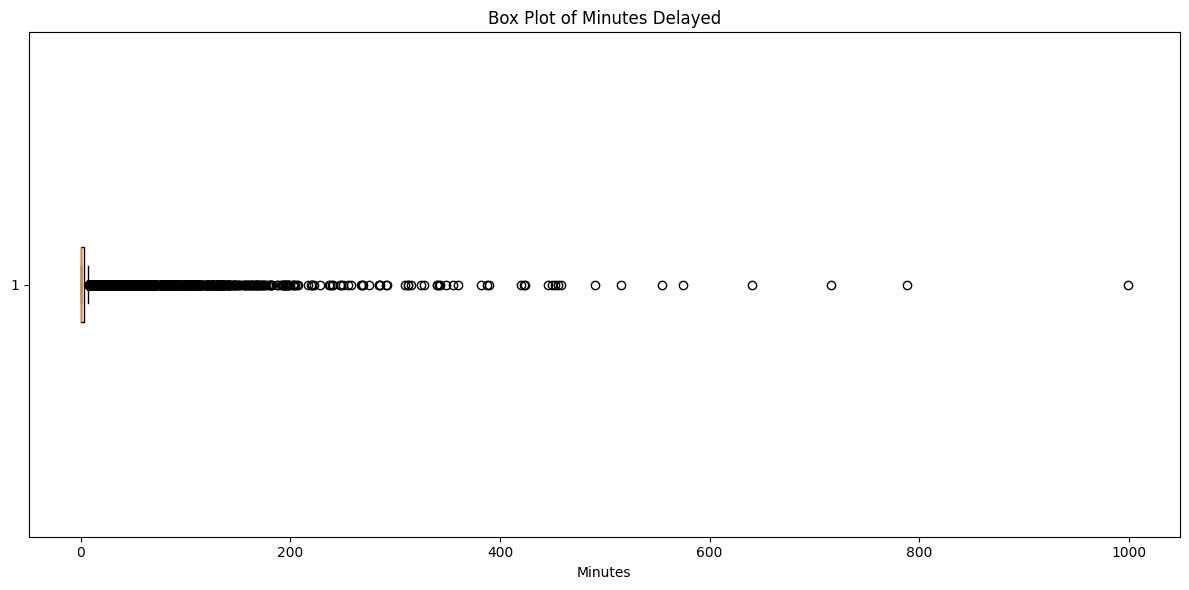

In [ ]:
plt.figure(figsize = (12, 6))
plt.boxplot(df_master['Min Delay'], vert = False)
plt.title('Box Plot of Minutes Delayed')
plt.xlabel('Minutes')
plt.tight_layout()
plt.show()

Looking at our box plot above, there seems to be instances wherein the minutes delayed lasted for more than 300 minutes, or 5 hours. Let's check if these instances make sense in the context of the cause of the delay.

In [ ]:
print(df_master[df_master['Min Delay'] > 300][['delay_cause', 'Min Delay']].sort_values(by = 'Min Delay'))
print("Total number of delay instances that lasted more than 300 minutes: ", df_master[df_master['Min Delay'] > 300]['delay_cause'].count())

                                         delay_cause  Min Delay
21578                                   VCC/RCIU/CCR        309
71212                            Miscellaneous Other        312
54336    Priority One - Train in Contact With Person        312
44166               Weather Reports / Related Delays        315
208211             Rail Defect/Fastenings/Power Rail        325
54985    Priority One - Train in Contact With Person        327
158739                                 Station Other        340
14165               Weather Reports / Related Delays        340
173047                                 Force Majeure        342
74265               Signals - Track Circuit Problems        343
69701                    Traction Power Rail Related        348
135428             Rail Defect/Fastenings/Power Rail        355
26967                 Fire/Smoke Plan B - Source TTC        360
53930                 Fire/Smoke Plan B - Source TTC        382
49265                           Rail Rel

Looking through the above table, we can determine that delays that lasted for 5 hours were caused by major incidents: train getting in contact with a person, criminal activity, fires, weather disturbances, structural defects, and voltage issues.

Although outliers can skew our data, we decide to keep these because we determined that the values are feasible given the nature of the cause of the delay.

## **Daily Delay Occurrences**

Let's plot the daily number of delay occurrences in a line graph.

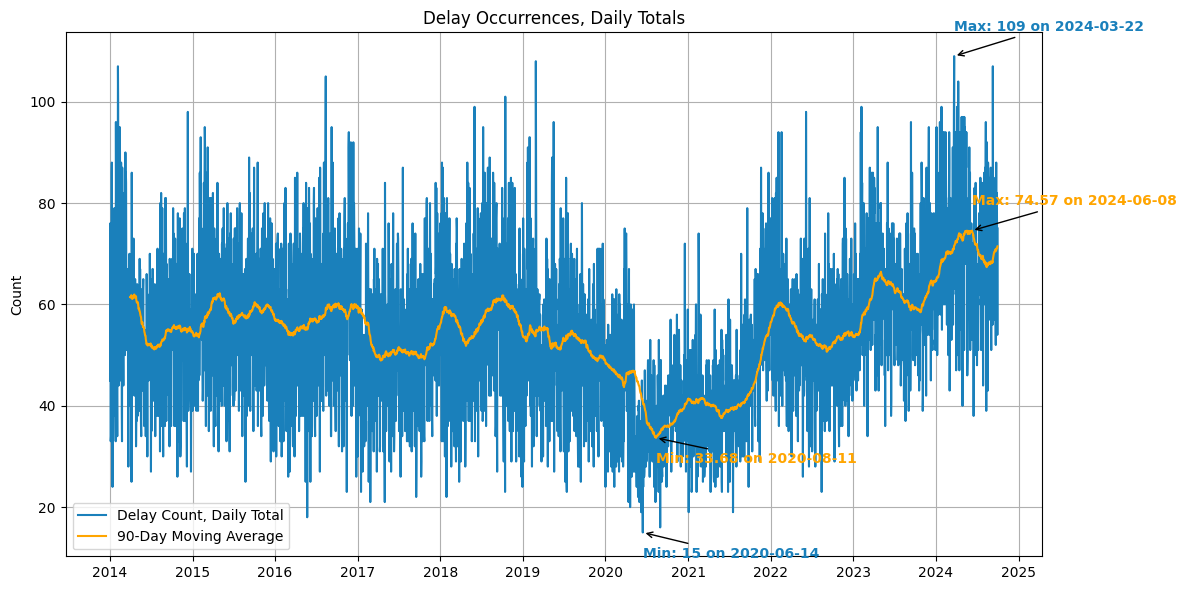

In [ ]:
daily_delay = df_master.groupby('Date')['Min Delay'].count().reset_index()
daily_delay['MA90'] = daily_delay['Min Delay'].rolling(window = 90).mean()
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(daily_delay['Date'], daily_delay['Min Delay'], color='#1a80bb', label='Delay Count, Daily Total')
ax.plot(daily_delay['Date'], daily_delay['MA90'], label='90-Day Moving Average', color='orange')
ax.set_title('Delay Occurrences, Daily Totals')
ax.set_ylabel('Count')
ax.grid(True)
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# maximum data annotation
max_date = daily_delay.loc[daily_delay['Min Delay'].idxmax(), 'Date']
max_delay = daily_delay['Min Delay'].max()
plt.annotate(f'Max: {max_delay} on {max_date.strftime("%Y-%m-%d")}',
             xy = (max_date, max_delay), xytext = (max_date, max_delay + 5),
             arrowprops = dict(arrowstyle = '->'), fontsize = 10, color = '#1a80bb', fontweight = 'bold')

# maximum moving average annotation
max_date = daily_delay.loc[daily_delay['MA90'].idxmax(), 'Date']
max_delay = daily_delay['MA90'].max()
plt.annotate(f'Max: {max_delay:.2f} on {max_date.strftime("%Y-%m-%d")}',
             xy = (max_date, max_delay), xytext = (max_date, max_delay + 5),
             arrowprops = dict(arrowstyle = '->'), fontsize = 10, color = 'orange', fontweight = 'bold')

# minimum data annotation
min_date = daily_delay.loc[daily_delay['Min Delay'].idxmin(), 'Date']
min_delay = daily_delay['Min Delay'].min()
plt.annotate(f'Min: {min_delay} on {min_date.strftime("%Y-%m-%d")}',
             xy = (min_date, min_delay), xytext = (min_date, min_delay - 5),
             arrowprops = dict(arrowstyle = '->'), fontsize = 10, color = '#1a80bb', fontweight = 'bold')

# minimum moving average data annotation
min_date = daily_delay.loc[daily_delay['MA90'].idxmin(), 'Date']
min_delay = daily_delay['MA90'].min()
plt.annotate(f'Min: {min_delay:.2f} on {min_date.strftime("%Y-%m-%d")}',
             xy = (min_date, min_delay), xytext = (min_date, min_delay - 5),
             arrowprops = dict(arrowstyle = '->'), fontsize = 10, color = 'orange', fontweight = 'bold')

fig.tight_layout()
plt.show()

The number of delays markedly decreased during the pandemic period, from the first quarter of 2020 to the end of 2021. Notably, post-pandemic averages saw an increasing trend, which mean that delays have been getting more frequent  compared to pre-pandemic trends.

One important thing to note here, however, is that the dataset includes delay instances that lasted for less than a minute. The TTC marks these as delay occurrences even if they lasted for only several seconds, such as whenever the train has to slow its speed due to 'Miscellaneous' reasons. Therefore, the increasing occurrences might not necessarily mean that TTC's operations are getting worse.

The increasing trend post-pandemic in itself is inconclusive, as this may also indicate better recording practices by TTC from a data collection perspective.

## **Delay Duration**

Let's look at a better metric: the total duration, in minutes, of delays per day.

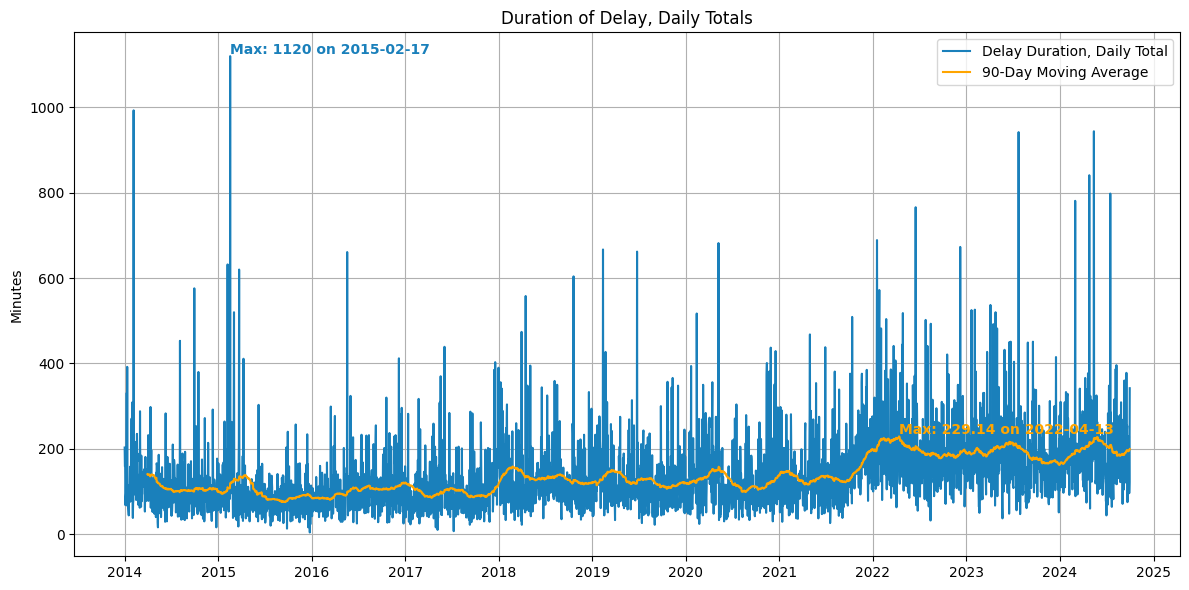

In [ ]:
daily_delay_duration = df_master.groupby('Date')['Min Delay'].sum().reset_index()
daily_delay_duration['MA90'] = daily_delay_duration['Min Delay'].rolling(window = 90). mean()
fig,ax = plt.subplots(figsize = (12,6))

ax.plot(daily_delay_duration['Date'], daily_delay_duration['Min Delay'], color = '#1a80bb', label = 'Delay Duration, Daily Total')
ax.plot(daily_delay_duration['Date'], daily_delay_duration['MA90'], color = 'orange', label = '90-Day Moving Average')
ax.set_title('Duration of Delay, Daily Totals')
ax.set_ylabel('Minutes')
ax.grid(True)
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# maximum data annotation
max_date = daily_delay_duration.loc[daily_delay_duration['Min Delay'].idxmax(), 'Date']
max_delay = daily_delay_duration['Min Delay'].max()
plt.annotate(f'Max: {max_delay} on {max_date.strftime("%Y-%m-%d")}',
             xy = (max_date, max_delay), xytext = (max_date, max_delay + 5),
             fontsize = 10, color = '#1a80bb', fontweight = 'bold')

# maximum moving average annotation
max_date = daily_delay_duration.loc[daily_delay_duration['MA90'].idxmax(), 'Date']
max_delay = daily_delay_duration['MA90'].max()
plt.annotate(f'Max: {max_delay:.2f} on {max_date.strftime("%Y-%m-%d")}',
             xy = (max_date, max_delay), xytext = (max_date, max_delay + 5),
             fontsize = 10, color = 'orange', fontweight = 'bold')

fig.tight_layout()
plt.show()

We see a more conclusive observation here: total delays per day have lasted longer since the pandemic. Indications of trouble started sometime in late 2021 when 90-day moving averages showed a sharply rising trend. A 90-day-average record-high was experienced on April 13, 2022 at 229.14 minutes of total delay. This is equivalent to 3.82 hours.

## **Time of Delay**

Here, let's total delay durations on a per minute basis, from 00:00 (12 midnight) to 23:59 (11:59 pm).

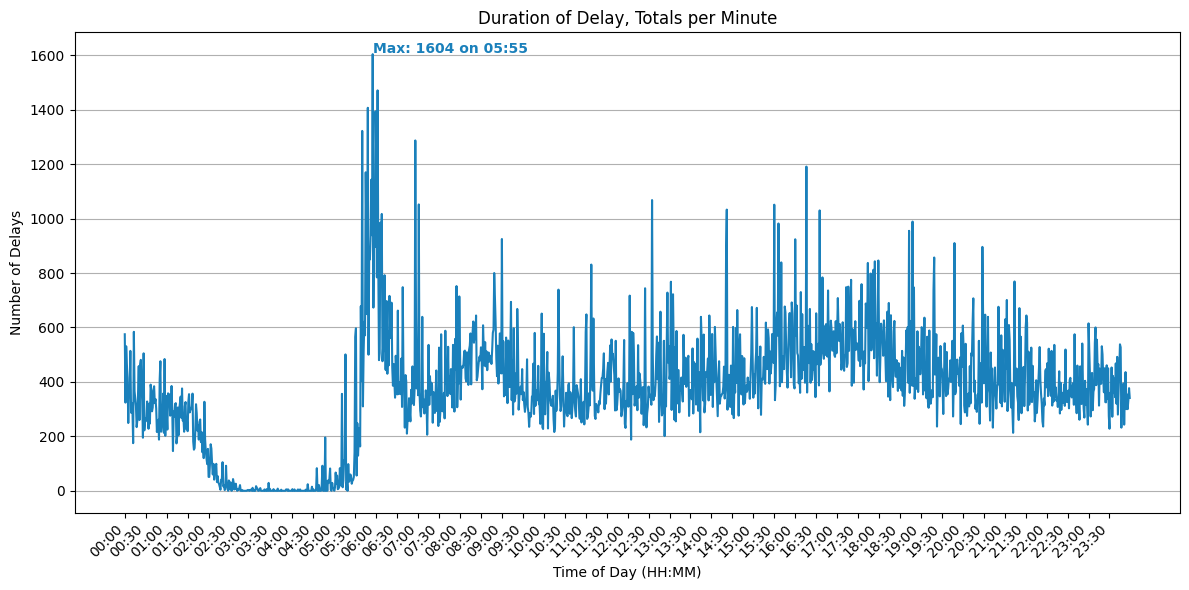

In [ ]:
delay_duration_per_minute = df_master.groupby('Time')['Min Delay'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(delay_duration_per_minute['Time'], delay_duration_per_minute['Min Delay'], color='#1a80bb')
#for x, y in zip(delay_duration_per_minute['Time'], delay_duration_per_minute['Min Delay']):
#    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

# maximum data annotation
max_time = delay_duration_per_minute.loc[delay_duration_per_minute['Min Delay'].idxmax(), 'Time']
max_delay = delay_duration_per_minute['Min Delay'].max()
plt.annotate(f'Max: {max_delay} on {max_time}',
             xy = (max_time, max_delay), xytext = (max_time, max_delay + 5),
             fontsize = 10, color = '#1a80bb', fontweight = 'bold')

plt.title('Duration of Delay, Totals per Minute')
plt.xlabel('Time of Day (HH:MM)')
plt.xticks(delay_duration_per_minute['Time'][::30], rotation=45, ha='right')
plt.ylabel('Number of Delays')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

When delay durations are totaled per minute, 05:55 (5:55 am) had the longest delays. This is a critical time for TTC commuters as this may represent a time when people are on their way to their workplaces.

## **Delay Causes**

One of the primary objectives of this paper is to determine whether we can improve the efficiency and reliability of the TTC Subway System. As shown below, there are 200 delay causes identified by the TTC in its excel file (they separated the delay causes between Lines 1 and 2, and Line 4; a number of causes are identical between them), out of which 144 were present in the dataset. This poses a huge problem in coming up with recommendations that are general enough without being too niche.

In [ ]:
grouped_delay_causes = df_master.groupby('delay_cause').agg(
  total_occurrence = ('Min Delay', 'count'),
  delay_duration = ('Min Delay', 'sum'),
).reset_index()
grouped_delay_causes['average_delay'] = grouped_delay_causes['delay_duration'] / grouped_delay_causes['total_occurrence']
grouped_delay_causes

,delay_cause,total_occurrence,delay_duration,average_delay
0,ATC Operator Related,342,1467,4.289474
1,ATC Project,3302,15434,4.674137
2,ATC RC&S Equipment,125,649,5.192000
3,ATC Signals Other,54,132,2.444444
4,Air Conditioning,361,1518,4.204986
...,...,...,...,...
139,Work Refusal,221,786,3.556561
140,Work Vehicle,153,1993,13.026144
141,Work Zone Problems - Signals,105,562,5.352381
142,Work Zone Problems - Track,581,6020,10.361446


In [ ]:
# for a consistent color-scheme per category, we're creating a dictionary here
colors = {'Personnel Related': 'red',
          'Equipment Related': 'orange',
          'Passenger Related': 'green',
          'Fortuitous Event': 'purple',
          'Undefined': 'gray'}

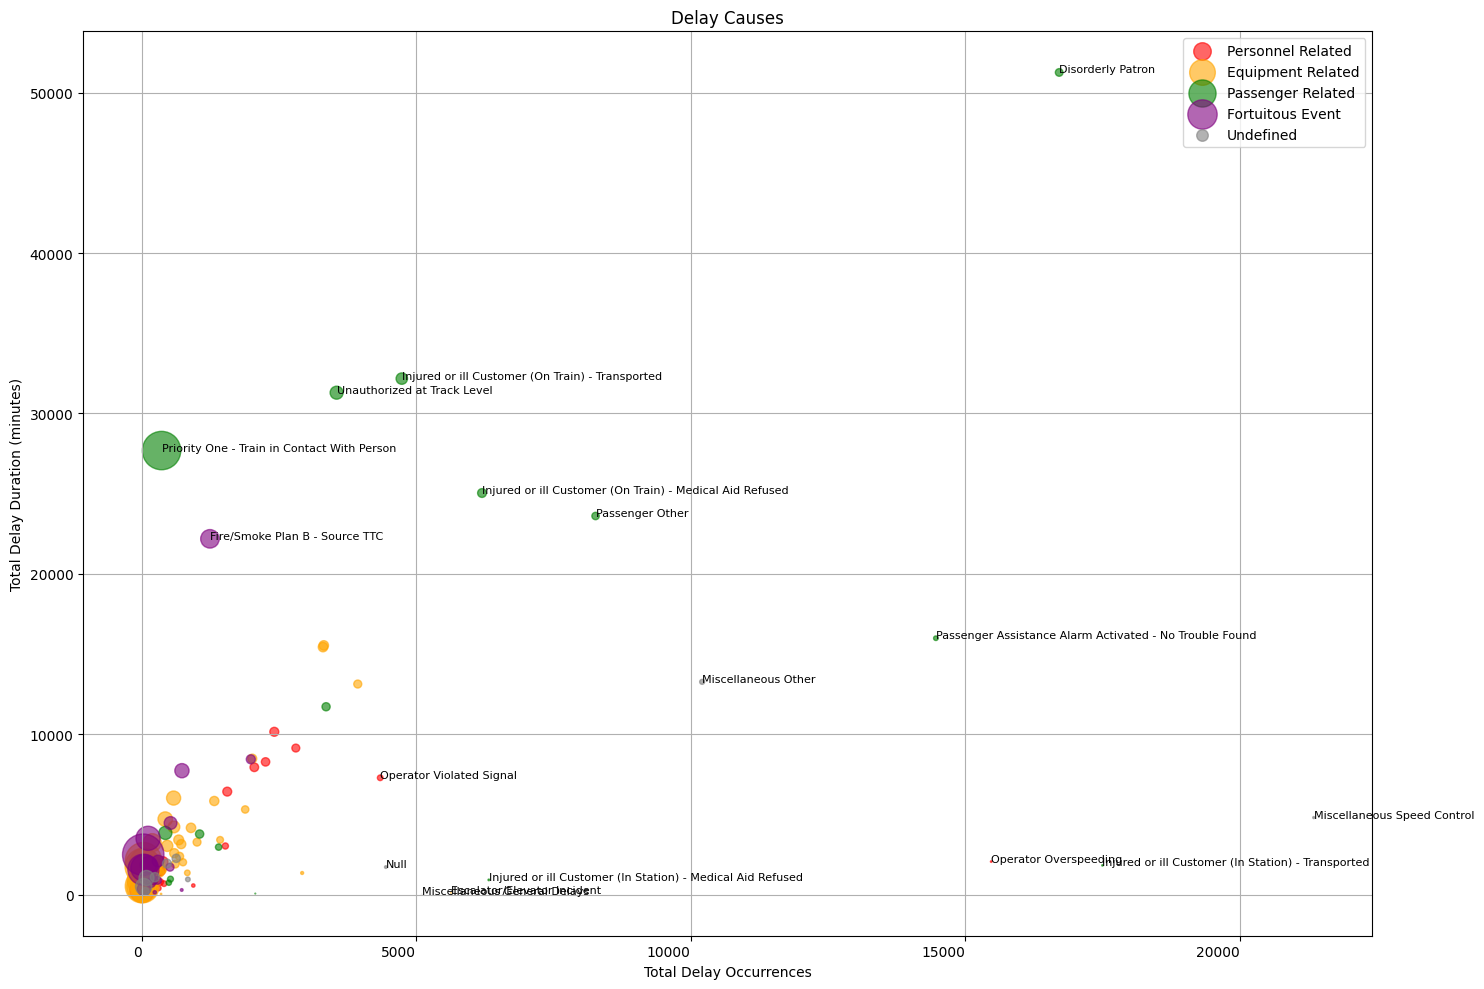

In [ ]:
plt.figure(figsize=(15, 10))
for category, color in colors.items():
    subset = grouped_delay_causes[grouped_delay_causes['delay_cause'].apply(lambda x: categorize_delay(x) == category)]
    plt.scatter(subset['total_occurrence'],
                subset['delay_duration'],
                s = subset['average_delay'] * 10,
                alpha = 0.6,
                label = category,
                c = color)

for i, row in grouped_delay_causes[
    (grouped_delay_causes['total_occurrence'] > 4000) |
    (grouped_delay_causes['delay_duration'] > 20000)
    ].iterrows():
    plt.annotate(row['delay_cause'], (row['total_occurrence'], row['delay_duration']), fontsize=8)

plt.title('Delay Causes')
plt.xlabel('Total Delay Occurrences')
plt.ylabel('Total Delay Duration (minutes)')
plt.xticks(rotation = 0, ha = 'right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This is why we did the clustering of the delay causes into Equipment Related, Fortuitous Event, Passenger Related, Personnel Related, Undefined categories. We'll be able to come up with more insightful recommendations per category.

There is a big disclaimer I have to bring up in this portion of our EDA. How I classified the 143 delay categories in the dataset was according to my own understanding of the delay cause. The nature of each delay cause is not known to me, so in reality I have no way of knowing whether I was able to categorized each cause correctly. For instance, I assumed that 'Air Conditioning' belongs in the Equipment Related category, and that 'ATC Operator Related' belongs in Personnel Related. Who's to say that I was right? Or that I was wrong? A TTC personnel, perhaps. Unfortunately, I don't have one with me.

Therefore, we're moving forward with our analysis with the assumption that I categorized the delays correctly.

## **Delay Categories**

### **Overview**

In [ ]:
# this is to make a table for the delay categories showing total count of occurrence and sum of delay duration
grouped_delay_categories = df_master.groupby('delay_category').agg(
  total_occurrence = ('Min Delay', 'count'),
  delay_duration = ('Min Delay', 'sum'),
).reset_index()
# this is to compute for the average delay per category, and include that as a new column in the table
grouped_delay_categories['average_delay'] = grouped_delay_categories['delay_duration'] / grouped_delay_categories['total_occurrence']
# to display the table
grouped_delay_categories

,delay_category,total_occurrence,delay_duration,average_delay
0,Equipment Related,39672,150769,3.800388
1,Fortuitous Event,7322,61007,8.332013
2,Passenger Related,87439,233870,2.674665
3,Personnel Related,36732,67672,1.842317
4,Undefined,43456,27767,0.638968


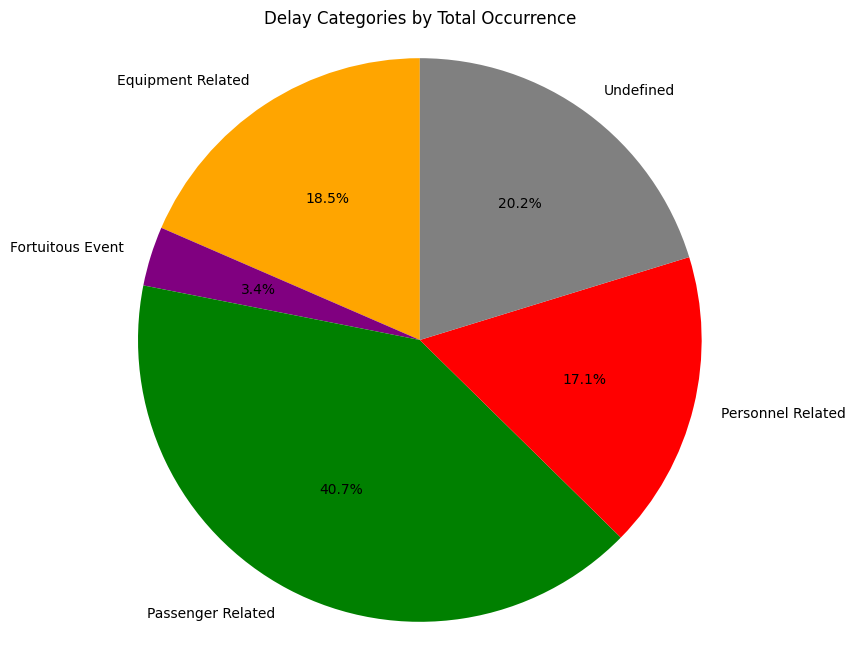

In [ ]:
# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_delay_categories['total_occurrence'], labels=grouped_delay_categories['delay_category'],
        autopct='%1.1f%%', startangle=90, colors=[colors[cat] for cat in grouped_delay_categories['delay_category']])
plt.title('Delay Categories by Total Occurrence')
plt.axis('equal')
plt.show()

Passenger Related delays happened the most during the study period despite only have 16 delay causes in this category. Undefined delays came in second, and had 10 delay causes grouped into this category. Equipment Related came third, with the most delay causes at 73. Fourth was Personnel Related, with 25 causes.

We can see here that Undefined causes pose another challenge in coming up with recommendations for the TTC. How do we solve an issue if we cannot even pinpoint what the issue is?

In [ ]:
# this is to make a table for the delay categories summed and counted per month
delay_by_month_category = df_master.groupby([df_master['datetime'].dt.to_period('M'), 'delay_category']).agg(
    total_occurrence=('Min Delay', 'count'),
    delay_duration=('Min Delay', 'sum'),
).reset_index()

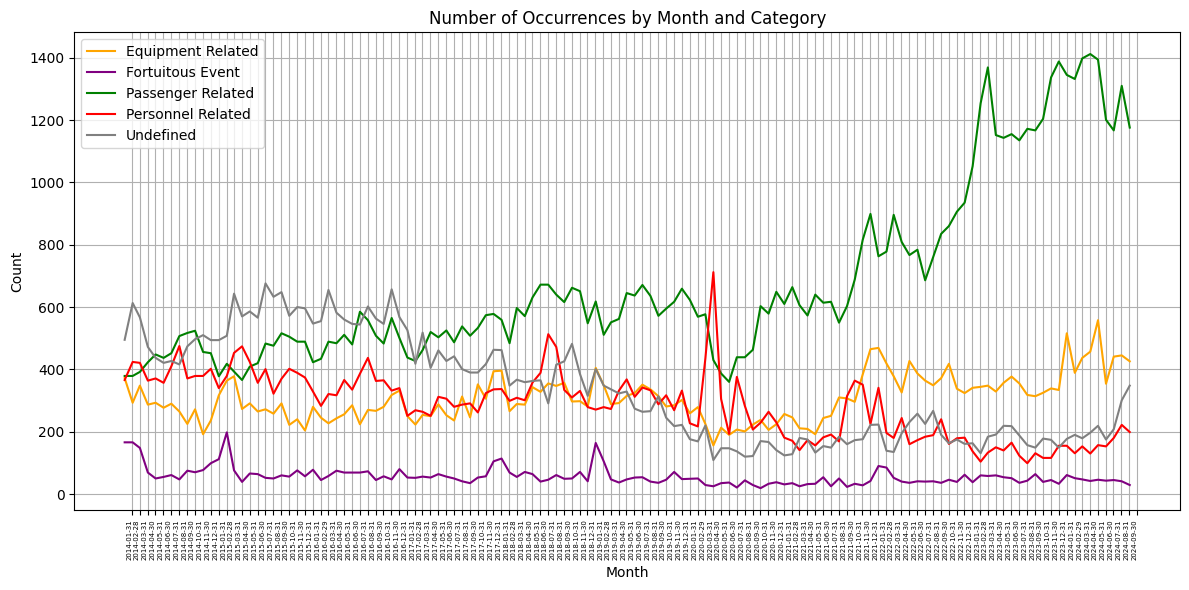

In [ ]:
# create the line chart to show monthly count of occurrences per category
plt.figure(figsize = (12, 6))
for category in delay_by_month_category['delay_category'].unique():
    subset = delay_by_month_category[delay_by_month_category['delay_category'] == category]
    plt.plot(subset['datetime'].dt.to_timestamp(), subset['total_occurrence'], label=category, color = colors[category])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Occurrences by Month and Category')
ticks = pd.date_range(start='2014-01-31', end='2024-09-30', freq='ME').to_pydatetime()
plt.xticks(ticks, rotation = 90, ha = 'right', fontsize = 5)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

The good news, though, is that it seems like Undefined delay causes has been decreasing since 2016. This may be from better data collection practices by the TTC which helped the TTC identify causes of delay more accurately. They should look out, however, as Undefined causes saw a spike in occurrences that started in July 2024 and continued until September 2024. Has the TTC been slipping in their accuracy?

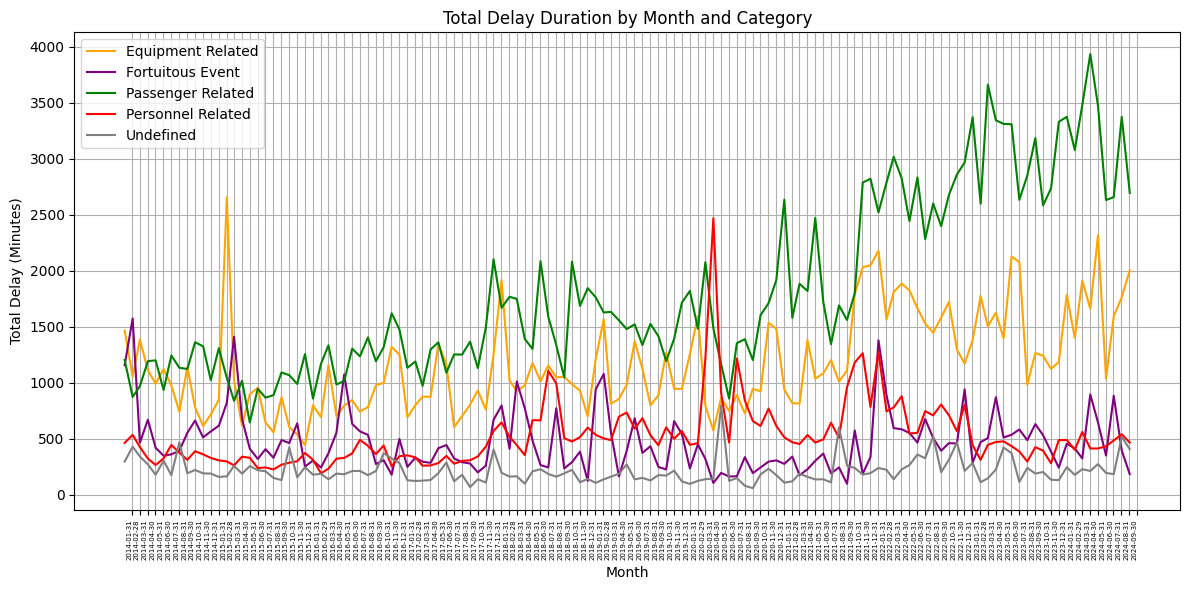

In [ ]:
# create the line chart to show monthly sum of delay duration per category
plt.figure(figsize = (12, 6))
for category in delay_by_month_category['delay_category'].unique():
    subset = delay_by_month_category[delay_by_month_category['delay_category'] == category]
    plt.plot(subset['datetime'].dt.to_timestamp(), subset['delay_duration'], label=category, color = colors[category])
plt.xlabel('Month')
plt.ylabel('Total Delay (Minutes)')
plt.title('Total Delay Duration by Month and Category')
ticks = pd.date_range(start='2014-01-31', end='2024-09-30', freq='ME').to_pydatetime()
plt.xticks(ticks, rotation = 90, ha = 'right', fontsize = 5)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In terms of impact, Passenger Related delays have been the

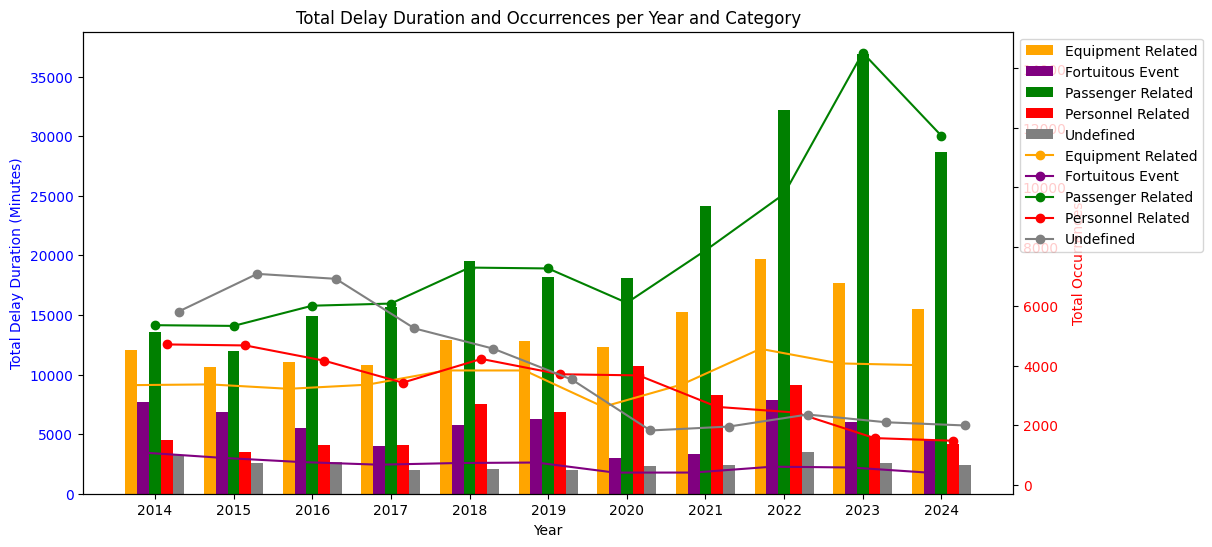

In [ ]:
# Group data by year and delay category, calculate total delay and occurrences
delay_by_year_category = df_master.groupby([df_master['datetime'].dt.year, 'delay_category']).agg(
    total_occurrence=('Min Delay', 'count'),
    delay_duration=('Min Delay', 'sum')
).reset_index()

# Get unique years and delay categories
years = delay_by_year_category['datetime'].unique()
delay_categories = delay_by_year_category['delay_category'].unique()

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total delay duration for each category
width = 0.15  # Width of bars for each category
x_positions = np.arange(len(years))  # X positions for bars

for i, category in enumerate(delay_categories):
    subset = delay_by_year_category[delay_by_year_category['delay_category'] == category]
    ax1.bar(x_positions + i * width, subset['delay_duration'], width, label=category, color=colors[category])

# Set up first axis (delay duration)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Delay Duration (Minutes)', color='blue')
ax1.set_xticks(x_positions + width * (len(delay_categories) -1) / 2)  # Center x-ticks
ax1.set_xticklabels(years)
ax1.tick_params('y', labelcolor='blue')

# Create second axis (occurrences)
ax2 = ax1.twinx()

# Plot total occurrences for each category
for i, category in enumerate(delay_categories):
    subset = delay_by_year_category[delay_by_year_category['delay_category'] == category]
    ax2.plot(x_positions + i * width, subset['total_occurrence'], color=colors[category], marker='o', label=category)

# Set up second axis (occurrences)
ax2.set_ylabel('Total Occurrences', color='red')
ax2.tick_params('y', labelcolor='red')


plt.title('Total Delay Duration and Occurrences per Year and Category')
fig.legend(loc="upper left", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

### **Equipment Related Delays**

In [ ]:
grouped_equipment_related = df_master[df_master['delay_category'] == 'Equipment Related']
grouped_equipment_related = grouped_equipment_related.groupby('delay_cause').agg(
  total_occurrence = ('Min Delay', 'count'),
  delay_duration = ('Min Delay', 'sum')
).reset_index()
grouped_equipment_related['average_delay'] = grouped_equipment_related['delay_duration'] / grouped_equipment_related['total_occurrence']
grouped_equipment_related

,delay_cause,total_occurrence,delay_duration,average_delay
0,ATC Project,3302,15434,4.674137
1,ATC RC&S Equipment,125,649,5.192000
2,ATC Signals Other,54,132,2.444444
3,Air Conditioning,361,1518,4.204986
4,Alternating Current,59,306,5.186441
...,...,...,...,...
70,Wind Shield,3,19,6.333333
71,Work Vehicle,153,1993,13.026144
72,Work Zone Problems - Signals,105,562,5.352381
73,Work Zone Problems - Track,581,6020,10.361446


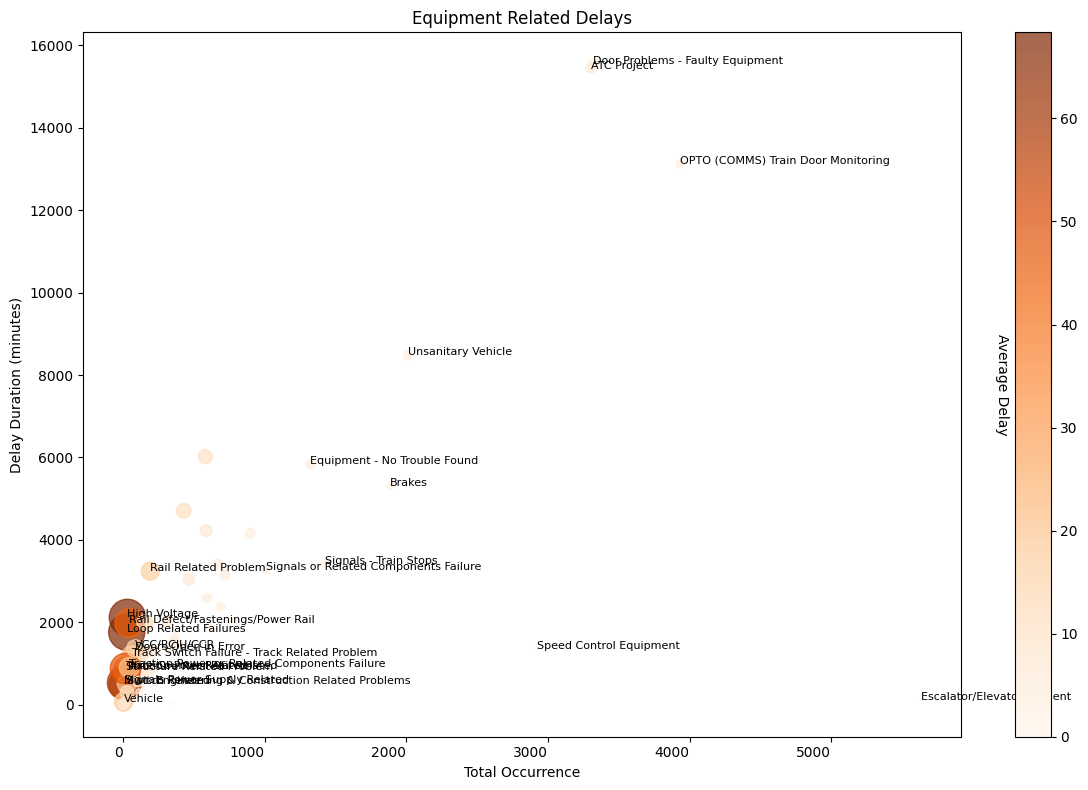

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(grouped_equipment_related['total_occurrence'],
                     grouped_equipment_related['delay_duration'],
                     s = grouped_equipment_related['average_delay'] * 10,
                     c = grouped_equipment_related['average_delay'],
                     cmap = 'Oranges',
                     alpha = 0.7)
# Annotate data points
for i, row in grouped_equipment_related[
    (grouped_equipment_related['total_occurrence'] > 1000) |
    (grouped_equipment_related['average_delay'] > 15)].iterrows():
    plt.annotate(row['delay_cause'], (row['total_occurrence'], row['delay_duration']), fontsize=8)
# Add colorbar
cbar = plt.colorbar(scatter, label = 'Average Delay (minutes)')
cbar.ax.set_ylabel('Average Delay', rotation = 270, labelpad = 15)
cbar.ax.yaxis.set_label_position('left')

plt.title('Equipment Related Delays')
plt.xlabel('Total Occurrence')
plt.ylabel('Delay Duration (minutes)')
plt.xticks(rotation = 0, ha = 'right')
plt.tight_layout()
plt.show()

### **Fortuitous Event Delays**

In [ ]:
grouped_fortuitous_event = df_master[df_master['delay_category'] == 'Fortuitous Event']
grouped_fortuitous_event = grouped_fortuitous_event.groupby('delay_cause').agg(
  total_occurrence = ('Min Delay', 'count'),
  delay_duration = ('Min Delay', 'sum')
).reset_index()
grouped_fortuitous_event['average_delay'] = grouped_fortuitous_event['delay_duration'] / grouped_fortuitous_event['total_occurrence']
grouped_fortuitous_event

,delay_cause,total_occurrence,delay_duration,average_delay
0,Bomb Threat,116,3511,30.267241
1,Collector Booth Alarm Activated,729,289,0.396433
2,Debris At Track Level - Uncontrollable,297,2096,7.057239
3,Door Problems - Debris Related,1987,8438,4.246603
4,Emergency Alarm Station Activation,733,7727,10.541610
5,Fire/Smoke Plan A,45,1662,36.933333
6,Fire/Smoke Plan B,31,1555,50.161290
7,Fire/Smoke Plan B - Source External to TTC,40,357,8.925000
8,Fire/Smoke Plan B - Source TTC,1243,22184,17.847144
9,Fire/Smoke Plan C,238,144,0.605042


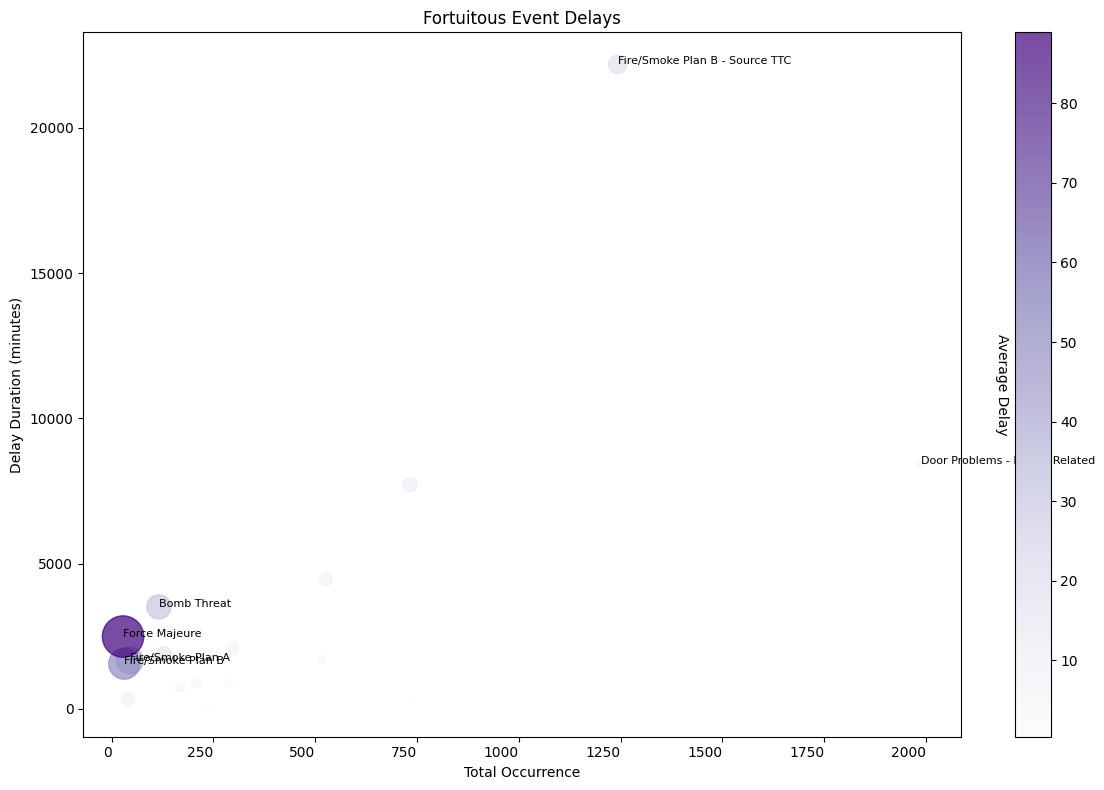

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(grouped_fortuitous_event['total_occurrence'],
                     grouped_fortuitous_event['delay_duration'],
                     s = grouped_fortuitous_event['average_delay'] * 10,
                     c = grouped_fortuitous_event['average_delay'],
                     cmap = 'Purples',
                     alpha = 0.7)
# Annotate data points
for i, row in grouped_fortuitous_event[
    (grouped_fortuitous_event['total_occurrence'] > 1000) |
    (grouped_fortuitous_event['average_delay'] > 15)].iterrows():
    plt.annotate(row['delay_cause'], (row['total_occurrence'], row['delay_duration']), fontsize=8)
# Add colorbar
cbar = plt.colorbar(scatter, label = 'Average Delay (minutes)')
cbar.ax.set_ylabel('Average Delay', rotation = 270, labelpad = 15)
cbar.ax.yaxis.set_label_position('left')

plt.title('Fortuitous Event Delays')
plt.xlabel('Total Occurrence')
plt.ylabel('Delay Duration (minutes)')
plt.xticks(rotation = 0, ha = 'right')
plt.tight_layout()
plt.show()

### **Personnel Related Delays**

In [ ]:
grouped_personnel_related = df_master[df_master['delay_category'] == 'Personnel Related']
grouped_personnel_related = grouped_personnel_related.groupby('delay_cause').agg(
  total_occurrence = ('Min Delay', 'count'),
  delay_duration = ('Min Delay', 'sum')
).reset_index()
grouped_personnel_related['average_delay'] = grouped_personnel_related['delay_duration'] / grouped_personnel_related['total_occurrence']
grouped_personnel_related

,delay_cause,total_occurrence,delay_duration,average_delay
0,ATC Operator Related,342,1467,4.289474
1,Crew Unable to Maintain Schedule,387,2050,5.297158
2,Divisional Clerk Related,339,1524,4.495575
3,ECD / Line Mechanic Related Prob.,52,272,5.230769
4,Injured Employee,940,568,0.604255
5,Labour Dispute - Subway,2,0,0.000000
6,Misc. Transportation Other - Employee Non-Char...,2807,9138,3.255433
7,No Operator Immediately Available,2051,7940,3.871282
8,No Operator Immediately Available - Not E.S.A....,2256,8276,3.668440
9,OPTO Operator Related,54,218,4.037037


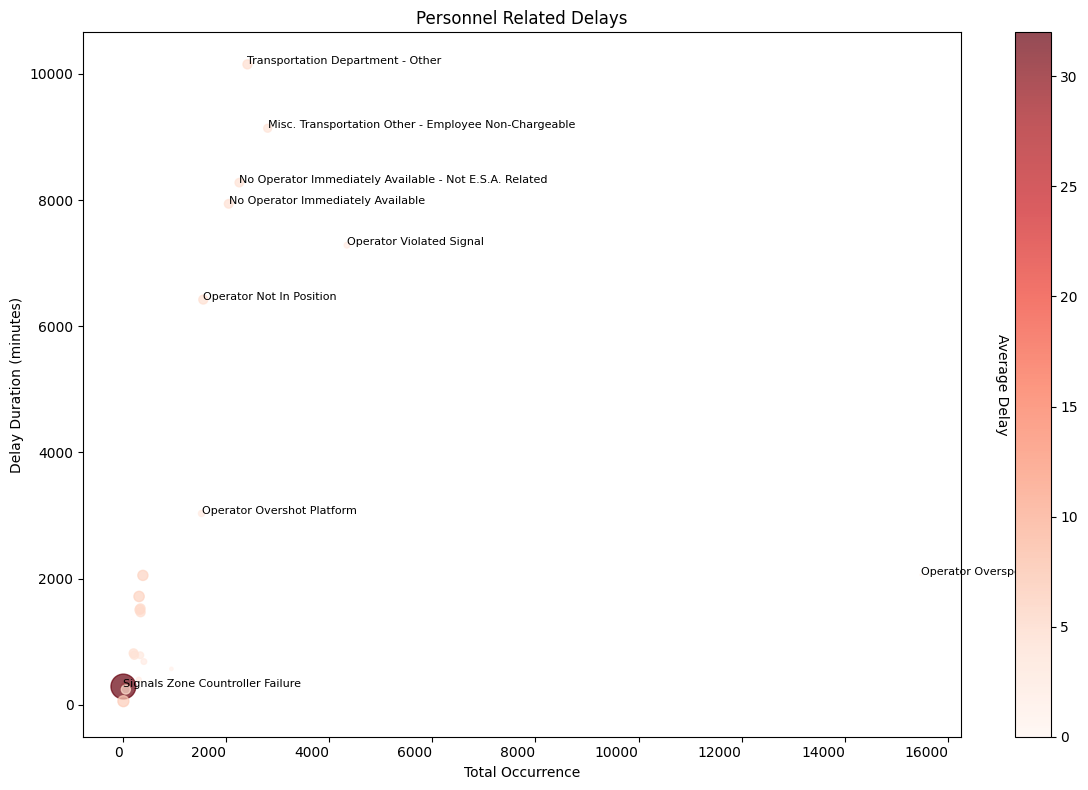

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(grouped_personnel_related['total_occurrence'],
                     grouped_personnel_related['delay_duration'],
                     s = grouped_personnel_related['average_delay'] * 10,
                     c = grouped_personnel_related['average_delay'],
                     cmap = 'Reds',
                     alpha = 0.7)
# Annotate data points
for i, row in grouped_personnel_related[
    (grouped_personnel_related['total_occurrence'] > 1000) |
    (grouped_personnel_related['average_delay'] > 15)].iterrows():
    plt.annotate(row['delay_cause'], (row['total_occurrence'], row['delay_duration']), fontsize=8)
# Add colorbar
cbar = plt.colorbar(scatter, label = 'Average Delay (minutes)')
cbar.ax.set_ylabel('Average Delay', rotation = 270, labelpad = 15)
cbar.ax.yaxis.set_label_position('left')

plt.title('Personnel Related Delays')
plt.xlabel('Total Occurrence')
plt.ylabel('Delay Duration (minutes)')
plt.xticks(rotation = 0, ha = 'right')
plt.tight_layout()
plt.show()

### **Passenger Related Delays**

In [ ]:
grouped_passenger_related = df_master[df_master['delay_category'] == 'Passenger Related']
grouped_passenger_related = grouped_passenger_related.groupby('delay_cause').agg(
  total_occurrence = ('Min Delay', 'count'),
  delay_duration = ('Min Delay', 'sum')
).reset_index()
grouped_passenger_related['average_delay'] = grouped_passenger_related['delay_duration'] / grouped_passenger_related['total_occurrence']
grouped_passenger_related

,delay_cause,total_occurrence,delay_duration,average_delay
0,Assault / Employee Involved,1401,2962,2.114204
1,Assault / Patron Involved,3358,11714,3.488386
2,Disorderly Patron,16710,51264,3.067864
3,Door Problems - Passenger Related,1055,3778,3.581043
4,Held By Polce - Non-TTC Related,431,3846,8.923434
5,Injured or ill Customer (In Station) - Medical...,6322,918,0.145207
6,Injured or ill Customer (In Station) - Transpo...,17498,1822,0.104126
7,Injured or ill Customer (On Train) - Medical A...,6198,25040,4.040013
8,Injured or ill Customer (On Train) - Transported,4737,32174,6.792062
9,Passenger Assistance Alarm Activated - No Trou...,14464,15987,1.105296


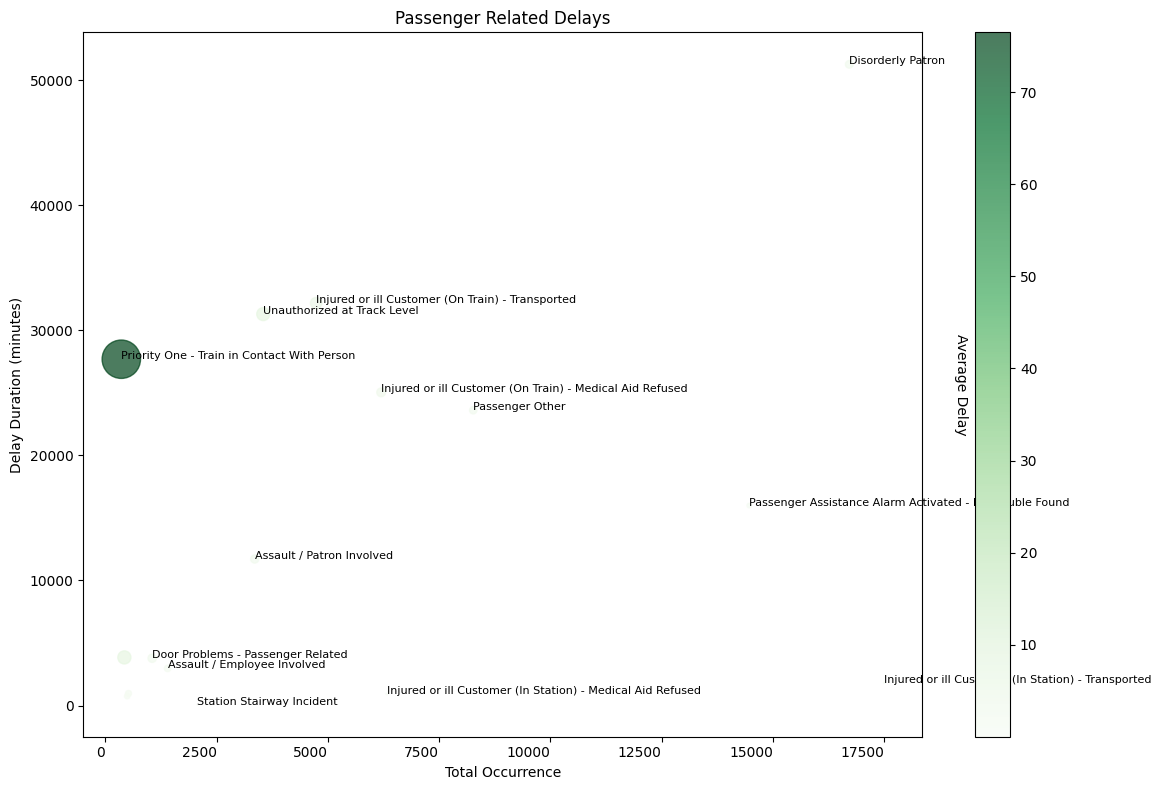

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(grouped_passenger_related['total_occurrence'],
                     grouped_passenger_related['delay_duration'],
                     s = grouped_passenger_related['average_delay'] * 10,
                     c = grouped_passenger_related['average_delay'],
                     cmap = 'Greens',
                     alpha = 0.7)
# Annotate data points
for i, row in grouped_passenger_related[
    (grouped_passenger_related['total_occurrence'] > 1000) |
    (grouped_passenger_related['average_delay'] > 15)].iterrows():
    plt.annotate(row['delay_cause'], (row['total_occurrence'], row['delay_duration']), fontsize=8)
# Add colorbar
cbar = plt.colorbar(scatter, label = 'Average Delay (minutes)')
cbar.ax.set_ylabel('Average Delay', rotation = 270, labelpad = 15)
cbar.ax.yaxis.set_label_position('left')

plt.title('Passenger Related Delays')
plt.xlabel('Total Occurrence')
plt.ylabel('Delay Duration (minutes)')
plt.xticks(rotation = 0, ha = 'right')
plt.tight_layout()
plt.show()

### **Undefined Delays**

In [ ]:
grouped_undefined = df_master[df_master['delay_category'] == 'Undefined']
grouped_undefined = grouped_undefined.groupby('delay_cause').agg(
  total_occurrence = ('Min Delay', 'count'),
  delay_duration = ('Min Delay', 'sum')
).reset_index()
grouped_undefined['average_delay'] = grouped_undefined['delay_duration'] / grouped_undefined['total_occurrence']
grouped_undefined

,delay_cause,total_occurrence,delay_duration,average_delay
0,Miscellaneous General Delays,5099,8,0.001569
1,Miscellaneous Other,10207,13266,1.299696
2,Miscellaneous Speed Control,21346,4803,0.225007
3,Null,4447,1717,0.386103
4,Other,88,1038,11.795455
5,RC&S Other,240,1085,4.520833
6,S/E/C Department Other,629,2263,3.597774
7,Signals Other,36,501,13.916667
8,Station Other,841,950,1.129608
9,T&S Other,459,1938,4.222222


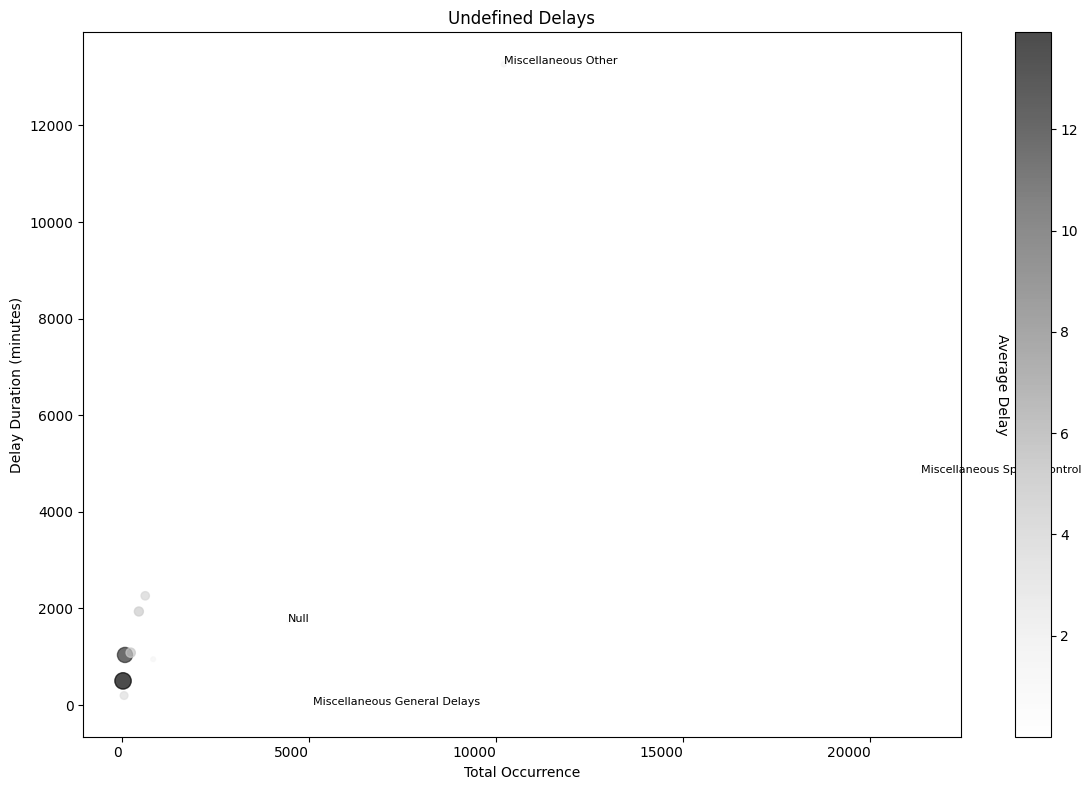

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(grouped_undefined['total_occurrence'],
                     grouped_undefined['delay_duration'],
                     s = grouped_undefined['average_delay'] * 10,
                     c = grouped_undefined['average_delay'],
                     cmap = 'Greys',
                     alpha = 0.7)
# Annotate data points
for i, row in grouped_undefined[
    (grouped_undefined['total_occurrence'] > 1000) |
    (grouped_undefined['average_delay'] > 15)].iterrows():
    plt.annotate(row['delay_cause'], (row['total_occurrence'], row['delay_duration']), fontsize=8)
# Add colorbar
cbar = plt.colorbar(scatter, label = 'Average Delay (minutes)')
cbar.ax.set_ylabel('Average Delay', rotation = 270, labelpad = 15)
cbar.ax.yaxis.set_label_position('left')

plt.title('Undefined Delays')
plt.xlabel('Total Occurrence')
plt.ylabel('Delay Duration (minutes)')
plt.xticks(rotation = 0, ha = 'right')
plt.tight_layout()
plt.show()

## **Lines**

In [ ]:
line = df_master.groupby('line_clean').agg(
    total_occurrences = ('line_clean', 'count'),
    delay_duration = ('Min Delay', 'sum')
).reset_index()
line['average_delay'] = line['delay_duration'] / line['total_occurrences']
line

,line_clean,total_occurrences,delay_duration,average_delay
0,Line 1 Yonge-University,91042,245268,2.694009
1,Line 2 Bloor-Danforth,78963,189191,2.395945
2,Line 3 Scarborough,4606,26640,5.783760
3,Line 4 Sheppard,3640,10622,2.918132
4,Lines 1 and 2 Shared,33555,62334,1.857667
5,Lines 1 and 4 Shared,2815,7030,2.497336


In [ ]:
import requests
import json
import io
import geopandas as gpd
from shapely.geometry import shape

# Modified URL to request GeoJSON data for layer 0, include '?f=json' to specify JSON format
url = "https://gis.toronto.ca/arcgis/rest/services/cot_geospatial7/FeatureServer/8/query?where=1%3D1&outFields=*&outSR=4326&f=geojson"
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

geojson_data = json.loads(response.text)

# Convert the GeoJSON data to a GeoDataFrame
ttc_map = gpd.GeoDataFrame.from_features(geojson_data["features"])

In [ ]:
station_delays = df_master.groupby('station_clean')['Min Delay'].sum().reset_index()

In [ ]:
ttc_map['extracted_word'] = ttc_map['PT_WEBSITE'].str.extract(r'http://www.ttc.ca/Subway/Stations/([^/]+)')

def clean_station_column(station_name):
    all_lines = {**line_1, **line_2, **line_3, **line_4, **line_1_2, **line_1_4}
    for category, keywords in all_lines.items():
      if any(keyword in station_name.lower() for keyword in keywords):
        return category
    return "Other"

ttc_map['station_clean'] = ttc_map['extracted_word'].apply(clean_station_column)
# manually correct sheppard yonge
ttc_map.loc[ttc_map['extracted_word'] == 'Sheppard-Yonge', 'station_clean'] = 'Sheppard-Yonge'
ttc_map.loc[ttc_map['extracted_word'] == 'Dundas_West', 'station_clean'] = 'Dundas West'

In [ ]:
ttc_map

,geometry,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,...,PT_ELEVATOR,PT_TRANSF_REQ,PT_PUB_WASH,PT_PHONE,PT_OTHER_TRAN,PT_WEBSITE,PT_EXTRA1,PT_EXTRA2,extracted_word,station_clean
0,POINT (-79.39835 43.70534),11272589,2190,Yonge St,2190 Yonge St,M4S 2B8,former Toronto,Toronto,None,115001,...,Yes,"97,A,B,C,D Only",Yes,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Eglinton/sta...,None,None,Eglinton,Eglinton
1,POINT (-79.39712 43.69785),7273830,1900,Yonge St,1900 Yonge St,M4S 1Z2,former Toronto,Toronto,None,115001,...,Yes,No,No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Davisville/s...,None,None,Davisville,Davisville
2,POINT (-79.39298 43.68811),14076438,15,St Clair Ave E,15 St Clair Ave E,M4T 1L8,former Toronto,Toronto,None,115001,...,Yes,97B Only,No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/St_Clair/sta...,None,None,St_Clair,St. Clair
3,POINT (-79.39079 43.68229),8681089,16,Shaftesbury Ave,16 Shaftesbury Ave,None,former Toronto,Toronto,None,115001,...,No,Yes,No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Summerhill/s...,None,None,Summerhill,Summerhill
4,POINT (-79.38875 43.67694),788874,7,Crescent Rd,7 Crescent Rd,None,former Toronto,Toronto,None,115001,...,No,97B Only,No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Rosedale/sta...,None,None,Rosedale,Rosedale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,POINT (-79.41309 43.76901),14076455,5152,Yonge St,5152 Yonge St,None,North York,Toronto,None,115001,...,No,"97,B,C Only",No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/North_York_C...,None,None,North_York_Centre,North York Centre
69,POINT (-79.41236 43.7617),13967653,20,Sheppard Ave W,20 Sheppard Ave W,M2N 7H9,North York,Toronto,None,115001,...,Yes,"97,B,C Only",Yes,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Sheppard-Yon...,None,None,Sheppard-Yonge,Sheppard-Yonge
70,POINT (-79.40636 43.7449),12036646,4025,Yonge St,4025 Yonge St,M2P 2E3,North York,Toronto,None,115001,...,Yes,"97,B,C Only",No,(416) 393-4636,GO York Mills,http://www.ttc.ca/Subway/Stations/York_Mills/s...,None,None,York_Mills,York Mills
71,POINT (-79.40193 43.72535),7762894,3101,Yonge St,3101 Yonge St,None,former Toronto,Toronto,George Milbrandt Parkette,115001,...,No,"97,A,B,C,D Only",No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Lawrence/sta...,None,None,Lawrence,Lawrence


In [ ]:
merged_data = ttc_map.merge(station_delays, left_on='station_clean', right_on='station_clean', how='left')
merged_data

,geometry,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,...,PT_TRANSF_REQ,PT_PUB_WASH,PT_PHONE,PT_OTHER_TRAN,PT_WEBSITE,PT_EXTRA1,PT_EXTRA2,extracted_word,station_clean,Min Delay
0,POINT (-79.39835 43.70534),11272589,2190,Yonge St,2190 Yonge St,M4S 2B8,former Toronto,Toronto,None,115001,...,"97,A,B,C,D Only",Yes,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Eglinton/sta...,None,None,Eglinton,Eglinton,18008.0
1,POINT (-79.39712 43.69785),7273830,1900,Yonge St,1900 Yonge St,M4S 1Z2,former Toronto,Toronto,None,115001,...,No,No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Davisville/s...,None,None,Davisville,Davisville,11014.0
2,POINT (-79.39298 43.68811),14076438,15,St Clair Ave E,15 St Clair Ave E,M4T 1L8,former Toronto,Toronto,None,115001,...,97B Only,No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/St_Clair/sta...,None,None,St_Clair,St. Clair,8249.0
3,POINT (-79.39079 43.68229),8681089,16,Shaftesbury Ave,16 Shaftesbury Ave,None,former Toronto,Toronto,None,115001,...,Yes,No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Summerhill/s...,None,None,Summerhill,Summerhill,5623.0
4,POINT (-79.38875 43.67694),788874,7,Crescent Rd,7 Crescent Rd,None,former Toronto,Toronto,None,115001,...,97B Only,No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Rosedale/sta...,None,None,Rosedale,Rosedale,6909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,POINT (-79.41309 43.76901),14076455,5152,Yonge St,5152 Yonge St,None,North York,Toronto,None,115001,...,"97,B,C Only",No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/North_York_C...,None,None,North_York_Centre,North York Centre,4472.0
69,POINT (-79.41236 43.7617),13967653,20,Sheppard Ave W,20 Sheppard Ave W,M2N 7H9,North York,Toronto,None,115001,...,"97,B,C Only",Yes,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Sheppard-Yon...,None,None,Sheppard-Yonge,Sheppard-Yonge,7030.0
70,POINT (-79.40636 43.7449),12036646,4025,Yonge St,4025 Yonge St,M2P 2E3,North York,Toronto,None,115001,...,"97,B,C Only",No,(416) 393-4636,GO York Mills,http://www.ttc.ca/Subway/Stations/York_Mills/s...,None,None,York_Mills,York Mills,8503.0
71,POINT (-79.40193 43.72535),7762894,3101,Yonge St,3101 Yonge St,None,former Toronto,Toronto,George Milbrandt Parkette,115001,...,"97,A,B,C,D Only",No,(416) 393-4636,None,http://www.ttc.ca/Subway/Stations/Lawrence/sta...,None,None,Lawrence,Lawrence,13981.0


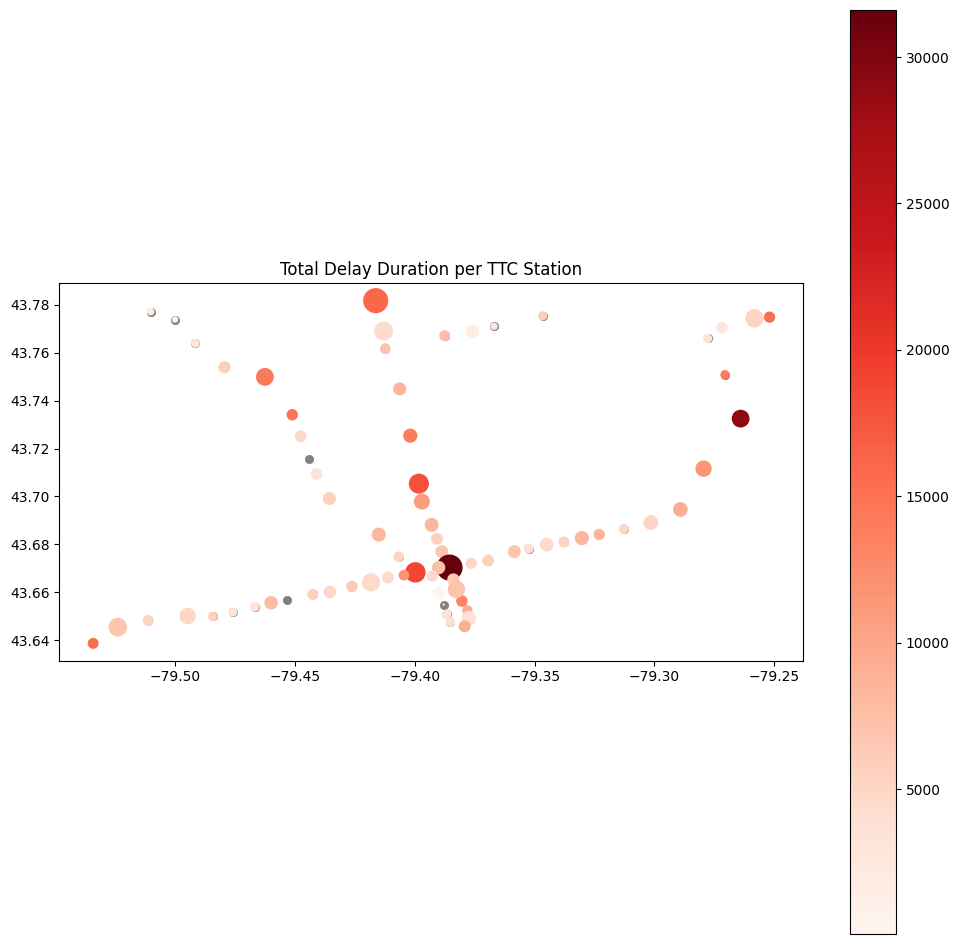

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ttc_map.plot(ax=ax, color='gray', linewidth=0.5)  # Plot subway lines
merged_data.plot(ax=ax, column='Min Delay', cmap='Reds', legend=True, markersize=merged_data['Min Delay'] / 100)  # Plot stations with delay data
plt.title('Total Delay Duration per TTC Station')
plt.show()

In [ ]:
all_stations = df_master['station_clean'].unique()
ttc_stations = ttc_map['station_clean'].unique()

In [ ]:
stations_not_in_map = [station for station in all_stations if station not in ttc_stations]

In [ ]:
print("Stations not in ttc_map:")
for station in stations_not_in_map:
    print(station)

Stations not in ttc_map:
Vaughan Metropolitan Centre
Highway


In [ ]:
ttc_map['PT_WEBSITE'].unique()

array(['http://www.ttc.ca/Subway/Stations/Eglinton/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Davisville/station.jsp',
       'http://www.ttc.ca/Subway/Stations/St_Clair/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Summerhill/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Rosedale/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Bloor-Yonge/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Warden/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Bay/station.jsp',
       'http://www.ttc.ca/Subway/Stations/St_Clair_West/station.jsp',
       'http://www.ttc.ca/Subway/Stations/St_George/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Museum/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Wellesley/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Sherbourne/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Castle_Frank/station.jsp',
       'http://www.ttc.ca/Subway/Stations/Broadview/station.jsp',
       'http:

# **Notes**

**line 1 stations**
vaughan_metropolitan_centre
highway_407
pioneer_village
york_university
finch_west
downsview_park
sheppard_west
wilson
yorkdale
lawrence_west
glencairn
eglinton_west
st.clair_west
dupont
museum
queens_park
st.patrick
osgoode
st.andrew
union
king
queen
dundas
college
wellesley
rosedale
summerhill
st.clair
davisville
eglinton
lawrence
york_mills
north_york_centre
finch

**line 2 stations**
kipling
islington
royal_york
old_mill
jane
runnymede
high_park
keele
dundas_west
lansdowne
dufferin
ossington
christie
bathurst
bay
sherbourne
castle_frank
broadview
chester
pape
donlands
greenwood
coxwell
woodbine
main_street
victoria_park
warden
kennedy

**line 3 stations**
lawrence_east
ellesmere
midland
scarborough_centre
mccowan

**line 1 and 2 common stations**
spadina
st.george
bloor_yonge

**line 4 stations**
bayview
bessarion
leslie
don_mills

**line 1 and 4 common stations**
sheppard_yonge